# Анализ рынка компьютерных игр
## Описание проекта
**Цель проекта** - определить, какие факторы определяют успешность игры.

**Заказчик** - интернет-магазин, продающий по всему миру компьютерные игры. Исследование позволит ему спрогнозировать продажи на будущий период.

**Исходные данные**: данные об играх и истории их продаж (до 2016 года), оценки пользователей и экспертов, жанры и платформы.

## Оглавление
* [Шаг 1. Открытие файла с данными и изучение общей информации](#h1_1)
* [Шаг 2. Предобработка данных](#h1_2)
* [Шаг 3. Исследовательский анализ данных](#h1_3)
* [Шаг 4. Составление портрета пользователя каждого региона](#h1_4)
* [Шаг 5. Проверка гипотез](#h1_5)
* [Шаг 6. Общий вывод](#h1_6)

### Общие функции для работы с данными

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Функция print_hist для вывода гистограмм
#  - data - датафрейм или колонка
#  - bins_count - число корзин гистограммы
#  - size - размер рисунка
#  - title - заголовок гистограммы
#  - x_name - название оси абсцисс
#  - y_name - названи оси ординат
def print_hist(data, column, bins_count, size, plot_title, x_name, y_name):
    data.hist(column = column, bins = bins_count, figsize=size)
    plt.grid(True)
    plt.title(plot_title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()
    
# Улучшение четкости изображения
%config InlineBackend.figure_format = 'retina'

## Шаг 1. Открытие файла с данными и изучение общей информации<a class="anchor" id="h1_1"></a>

In [109]:
df = pd.read_csv('/datasets/games.csv')

Изучим общую информацию и посмотрим примеры данных.

In [110]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


* в данных имеется большое количество пропущенных значений

## Шаг 2. Предобработка данных<a class="anchor" id="h1_2"></a>
### 2.1. Переименование столбцов
Для удобства дальнейшей работы приведем к нижнему регистру названия столбцов:

In [111]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### 2.2. Обработка пропусков и приведение типов
#### Название игры (`name`)

Посмотрим, какие есть пропуски в колонке `name`:

In [112]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим эти данные:

In [113]:
df.dropna(subset = ['name'], inplace = True)

#### Платформа (`platform`)
Согласно общей информации, явных пропусков а данной колонке нет. Посмотрим список возможных значений.

In [114]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Среди значений встречаются очень редкие платформы, по которым разработано очень мало игр. Посмотрим примеры:

In [115]:
df.query('platform in ("GG","PCFX","TG16", "3DO", "WS")')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3926,Final Fantasy,WS,2000.0,Role-Playing,0.0,0.0,0.51,0.0,NaN,NaN,NaN
6110,Digimon Adventure: Anode Tamer,WS,1999.0,Role-Playing,0.0,0.0,0.28,0.0,NaN,NaN,NaN
6650,Final Fantasy II,WS,2001.0,Role-Playing,0.0,0.0,0.25,0.0,NaN,NaN,NaN
8039,Chocobo no Fushigi Dungeon for WonderSwan,WS,1999.0,Role-Playing,0.0,0.0,0.18,0.0,NaN,NaN,NaN
8294,Super Robot Taisen Compact 2 Dai-1-Bu,WS,2000.0,Strategy,0.0,0.0,0.17,0.0,NaN,NaN,NaN
9223,Doukyuusei,TG16,1995.0,Adventure,0.0,0.0,0.14,0.0,NaN,NaN,NaN
12663,Policenauts,3DO,1995.0,Adventure,0.0,0.0,0.06,0.0,NaN,NaN,NaN
13571,Sonic the Hedgehog 2 (8-bit),GG,1992.0,Platform,0.0,0.0,0.04,0.0,NaN,NaN,NaN
14224,SD Gundam G Generation: Gather Beat 2,WS,2001.0,Strategy,0.0,0.0,0.03,0.0,NaN,NaN,NaN
14634,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996.0,Role-Playing,0.0,0.0,0.03,0.0,NaN,NaN,NaN


Как видно по данным, это какие-то локальные платформы (во всех примерах это Япония). Особенных проблем в этих данных не видно.

#### Год выпуска (`year_of_release`)

Посмотрим записи с пустым годом выпуска:

In [116]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В данных записях не видно каких-то особенностей, которые выделяли бы их среди других. Год выпуска важен для дальнейшего анализа. Корректно заполнить его не получится из текущих данных. Из других источников можно найти год выпуска по названию игры и платформе (на разных платформах игры могут выпускаться в разное время). Но это достаточно трудоемкий процесс. Ввиду того, что записей с пустым значением года выпуска не так много, то лучше удалить их из набора данных.

In [117]:
df.dropna(subset = ['year_of_release'], inplace = True)

Теперь после того, как пропуски в данной колонке обработаны, можно привести ее к нужному типу. Поскольку здесь указан только год, то приведения к целочисленному типу должно быть достаточно.

In [118]:
df['year_of_release'] = df['year_of_release'].astype('int')

#### Жанр (`genre`)
Согласно общей информации, явных пропусков а данной колонке нет. Посмотрим список возможных значений.

In [119]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

Значения вяглядят корректными.

#### Продажи (`*_sales`)
В данных колонках не найдено пропущенных значений. Но возможно есть другие проблемы. Посмотрим на гистограммы распределений данных в этих колонках.

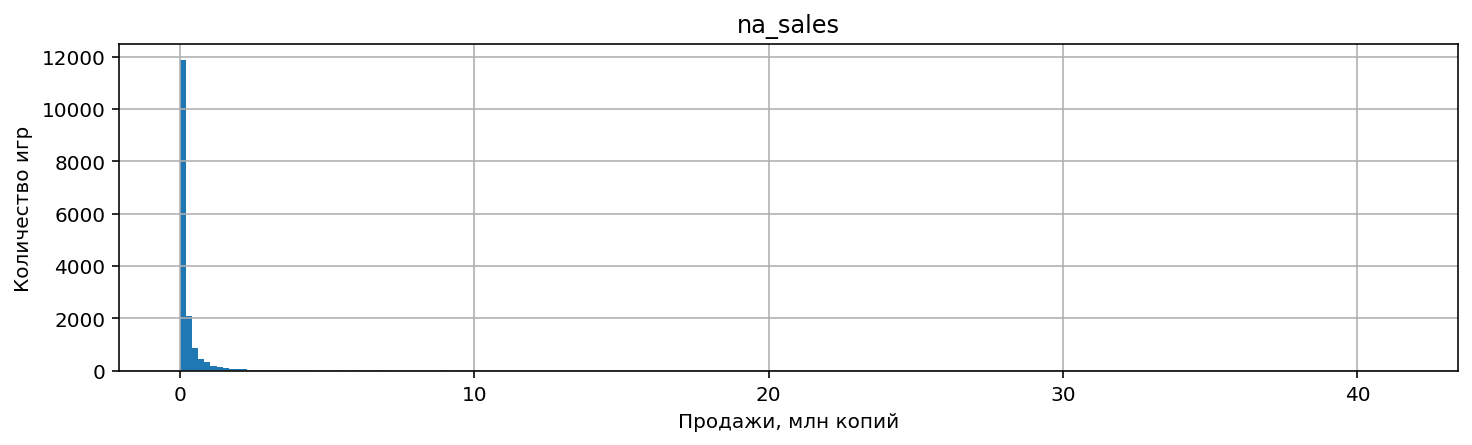

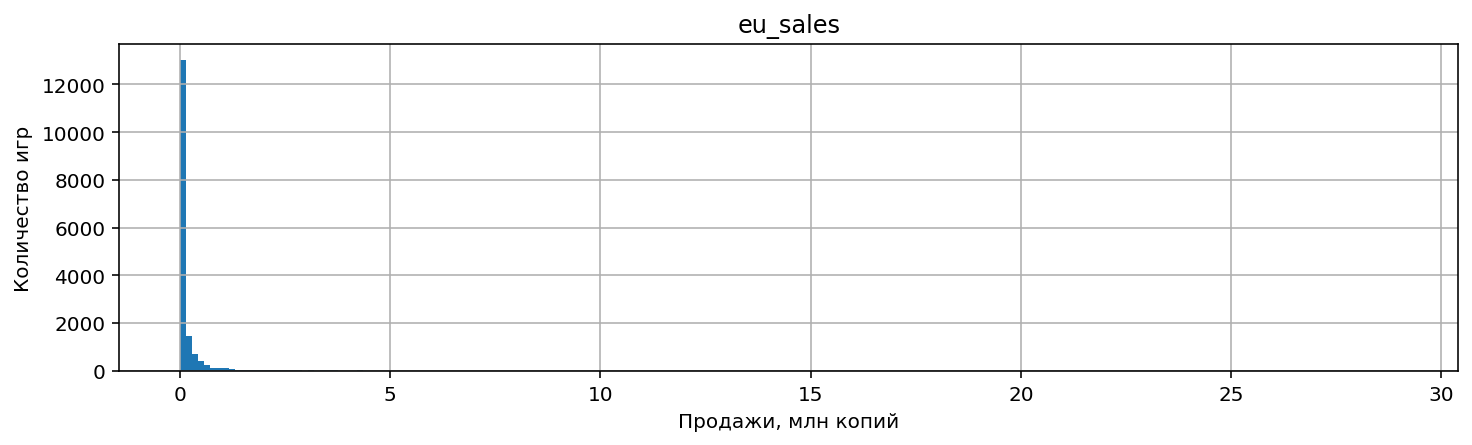

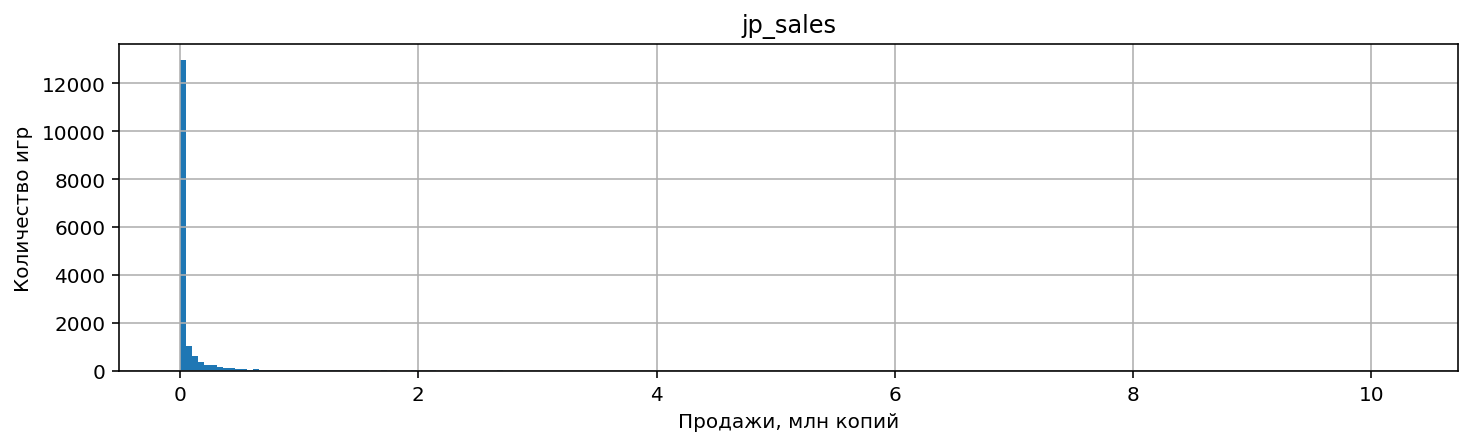

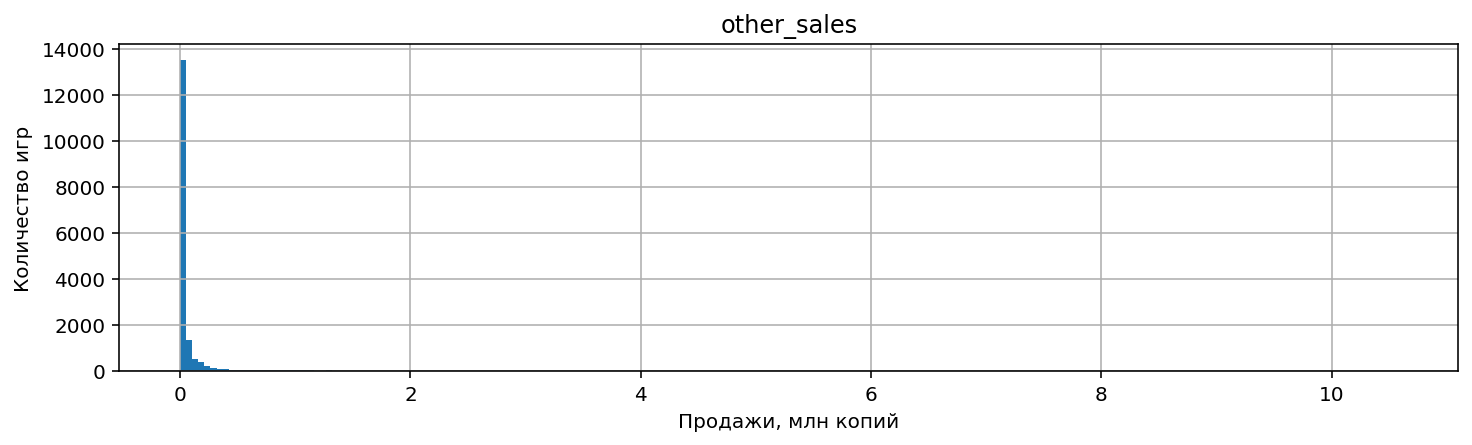

In [120]:
for name in df.columns[4:8]:
    print_hist(df, name, 200, (12,3), name, 'Продажи, млн копий', 'Количество игр')

Картина во всех распределениях оказалась примерно одинаковая: продажи большей части выпущенных до 2017 года игр оказались не более 200 тыс копий. И в то же время имеются небольшое количество игр со сверхвысокими продажами.

#### Оценка критиков (`critic_score`)

In [121]:
print('Количество пропусков в колонке critic_score:',len(df[df['critic_score'].isna()]))

Количество пропусков в колонке critic_score: 8461


Для тех игр, у которых есть релизы по другим платформам с оценками, логично заполнить пустые значения на основе имеющихся данных. Например, возьмем для примера игру с наибольшим количеством выпусков под разные платформы "Need for Speed: Most Wanted".

In [122]:
df[(df['name'] == 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Как видно, оценки в основном очень близки друг к другу. Но есть и отдельные выпуски с существенно отличными оценками. Поэтому не будем заполнять пропуски в данной колонке, чтобы не искажать данные.

#### Оценка пользователей (`user_score`)
Посмотрим подробнее на возможные значения в данной колонке:

In [123]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.7       2
1.3       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В колонке имеется текстовое значение "tbd" (to be detailed). По сути оно равносильно пропуску, поэтому заполним эти значения NaN.

In [124]:
df.loc[df.user_score == 'tbd', 'user_score'] = np.nan

Теперь преобразуем колонку к числовому типу и посчитаем количество пропусков:

In [125]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print('Количество пропусков в колонке user_score: ',len(df[df['user_score'].isna()]))

Количество пропусков в колонке user_score:  8981


Здесь, аналогично колонке `critic_score` не будем удалять пропуски, чтобы не искажать данные. Корректно заполнить их на основе текущих данных не получится.

Построим гистограмму распределения данного параметра:

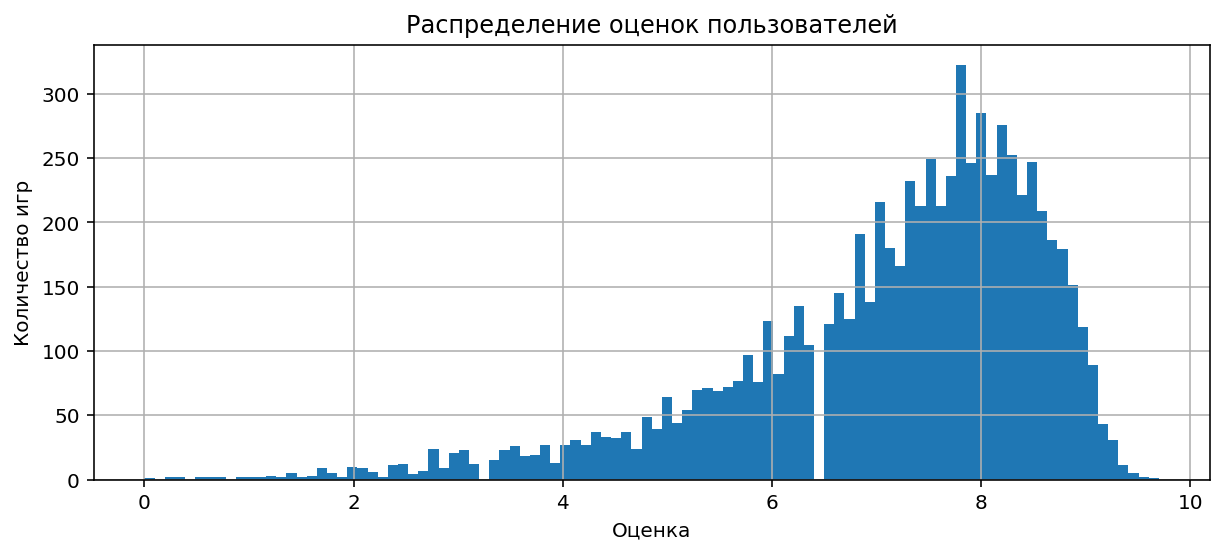

In [126]:
print_hist(df, 'user_score', 100, (10,4), 'Распределение оценок пользователей', 'Оценка', 'Количество игр')

Явно выделяющихся значений на гистограмме не наблюдается.

#### Рейтинг от организации ESRB (`rating`)

Посмотрим на возможные значения колонки с рейтингом и их количество:

In [127]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

В данной колонке также имеются пропуски, но заполнить их на основе имеющихся данных не представляется возможным.

### Расчет суммарных продаж
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [128]:
df['overall_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Построим гистограмму распределения суммарных продаж:

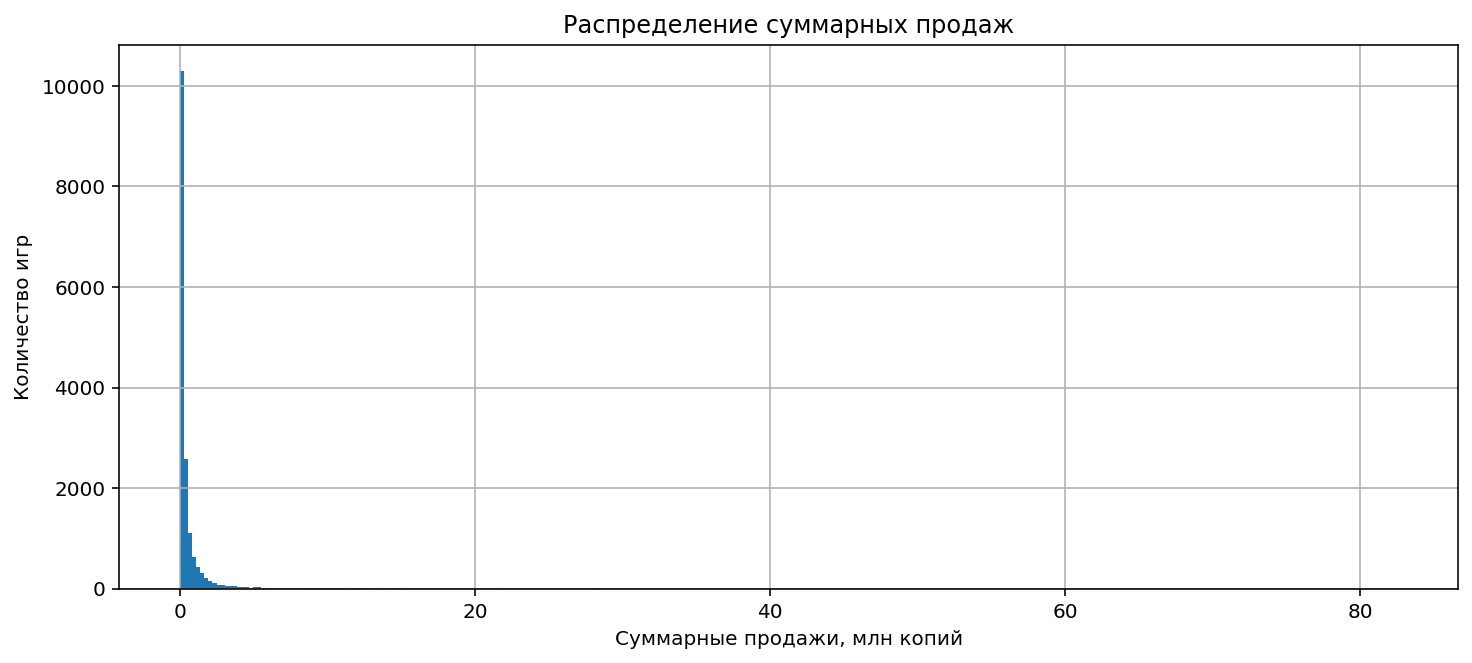

In [129]:
print_hist(df, 'overall_sales', 300, (12,5), 'Распределение суммарных продаж', 'Суммарные продажи, млн копий', 'Количество игр')

Из гистограммы видна та же картина, что и для продаж по регионам в отдельности.

### Выводы по шагу 2
1. Удалены пропуски в столбцах с названием игры (`name`), годом выпуска (`year_of_release`)
2. В колонке `user_score` обработаны неявные пропуски (значение "tbd").
3. Для части пропусков в столбцах с оценками пользователей и критиков (`critic_score` и `user_score`) удалось заполнить. Для остальных записей пропуски оставлены пустыми, поскольку на основании имеющихся данных сложно прогнозировать оценку игры.
4. Для всех игр рассчитаны суммарные продажи.


## Шаг 3. Исследовательский анализ данных<a class="anchor" id="h1_3"></a>
### 3.1. Количество игр по годам
Посмотрим, сколько игр выпускалось в разные годы. Для наглядности построим график.

AxesSubplot(0.125,0.125;0.775x0.755)


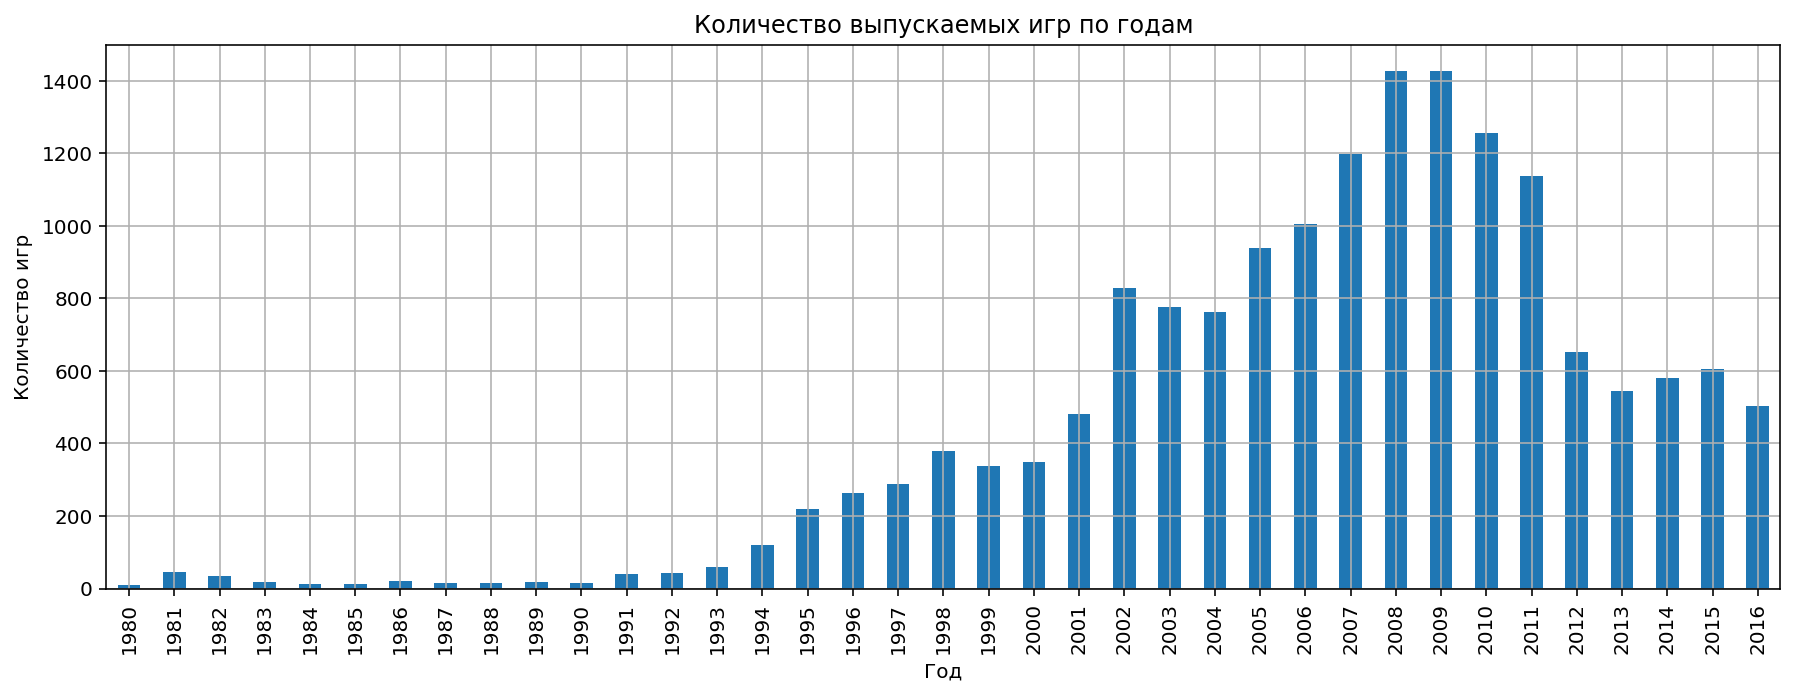

In [130]:
plot = df.groupby('year_of_release')['year_of_release'].agg('count').plot(kind='bar', title='Количество выпускаемых игр по годам', grid=True, figsize=(15, 5))
plot.set_xlabel('Год')
plot.set_ylabel('Количество игр')
print(plot)

По графику видно, что пик в индустрии компьютерных игр приходится на период 2007-2011 годы. Далее по какой-то причине идет резкий спад в количестве выпускаемых игр.

Поскольку нашей целью является прогноз на будущее, то нас не интересуют все периоды. С одной стороны, нам важно понимать статистику по актуальным тенденциям в игровой индустрии, понимать потребности современных пользователей.

### 3.2. Изменение продаж по платформам
Посмотрим, как менялись продажи по платформам.

Сначала выберем 10 платформ с наибольшими суммарными продажами.

In [131]:
platforms = df.groupby('platform')['overall_sales'].agg('sum').sort_values(ascending = False).head(10).index

Построим график распределения продаж по годам для каждой из 10 платформ с наибольшими суммарными продажами.

AxesSubplot(0.125,0.125;0.775x0.755)


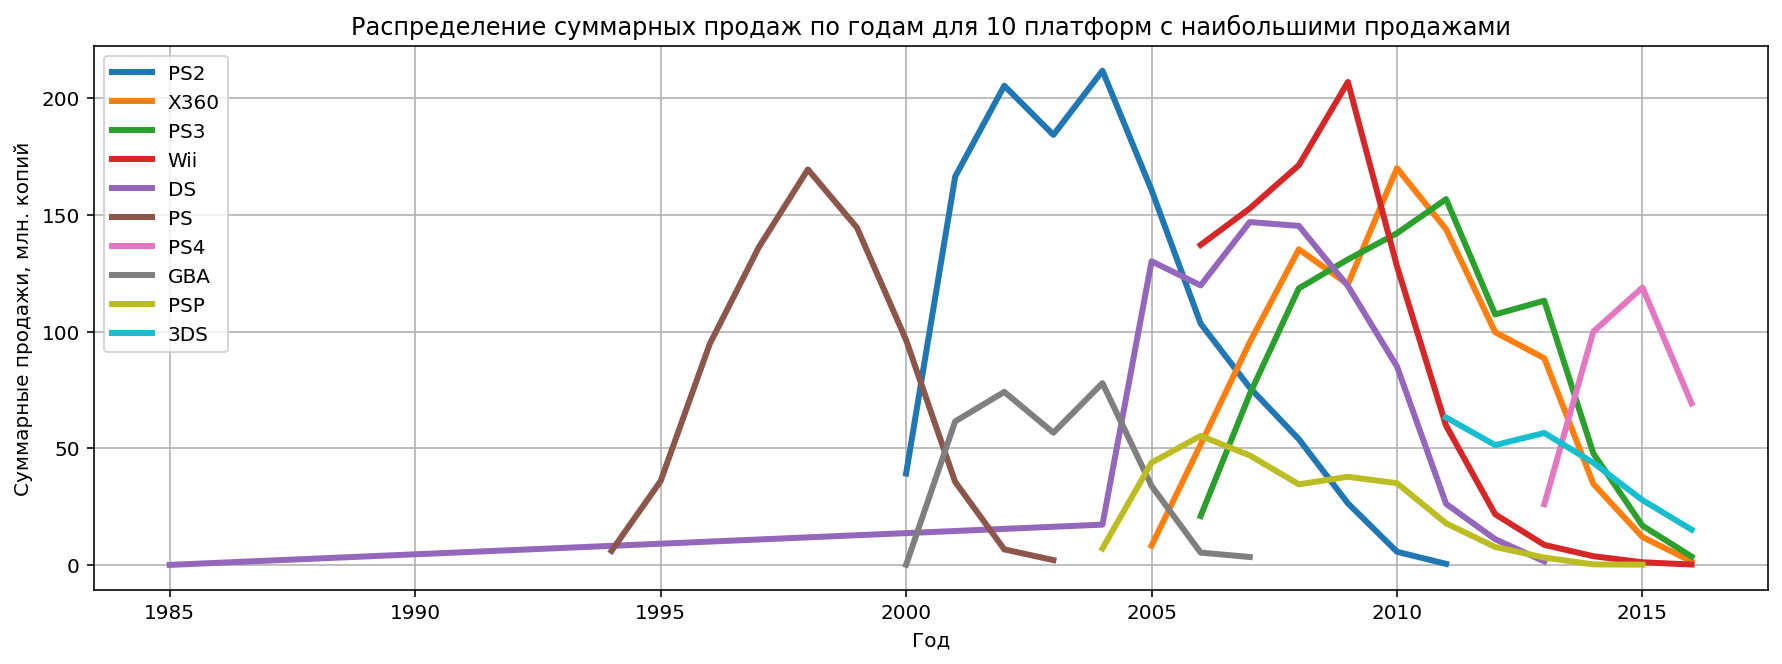

In [132]:
for item in platforms:
    plot = df.query('platform == @item').groupby('year_of_release')['overall_sales'].agg('sum').plot(kind='line', title='Распределение суммарных продаж по годам для 10 платформ с наибольшими продажами', grid=True, figsize=(15, 5), linewidth=3)
labels= platforms
plt.legend(labels)
plot.set_xlabel('Год')
plot.set_ylabel('Суммарные продажи, млн. копий')
print(plot)

По графику видно, что характерный срок жизни платформы составляет примерно 10 лет.
Также по графику видно, что почти по всем из рассматриваемых платформ пик продаж уже прошел.

### 3.3. Определение актуального периода
Поскольку нам необходимо построить прогноз на 2017 год, нам необходимо взять данные за соответствующий актуальный период.
Попробуем его определить.

Посмотрим, под какие платформы в последние годы выпускаются игры. Для этого возьмем данные по играм, выпускаемым с 2015 года и построим графики с распределением количества выпускаемых игр по данным платформам за все время.

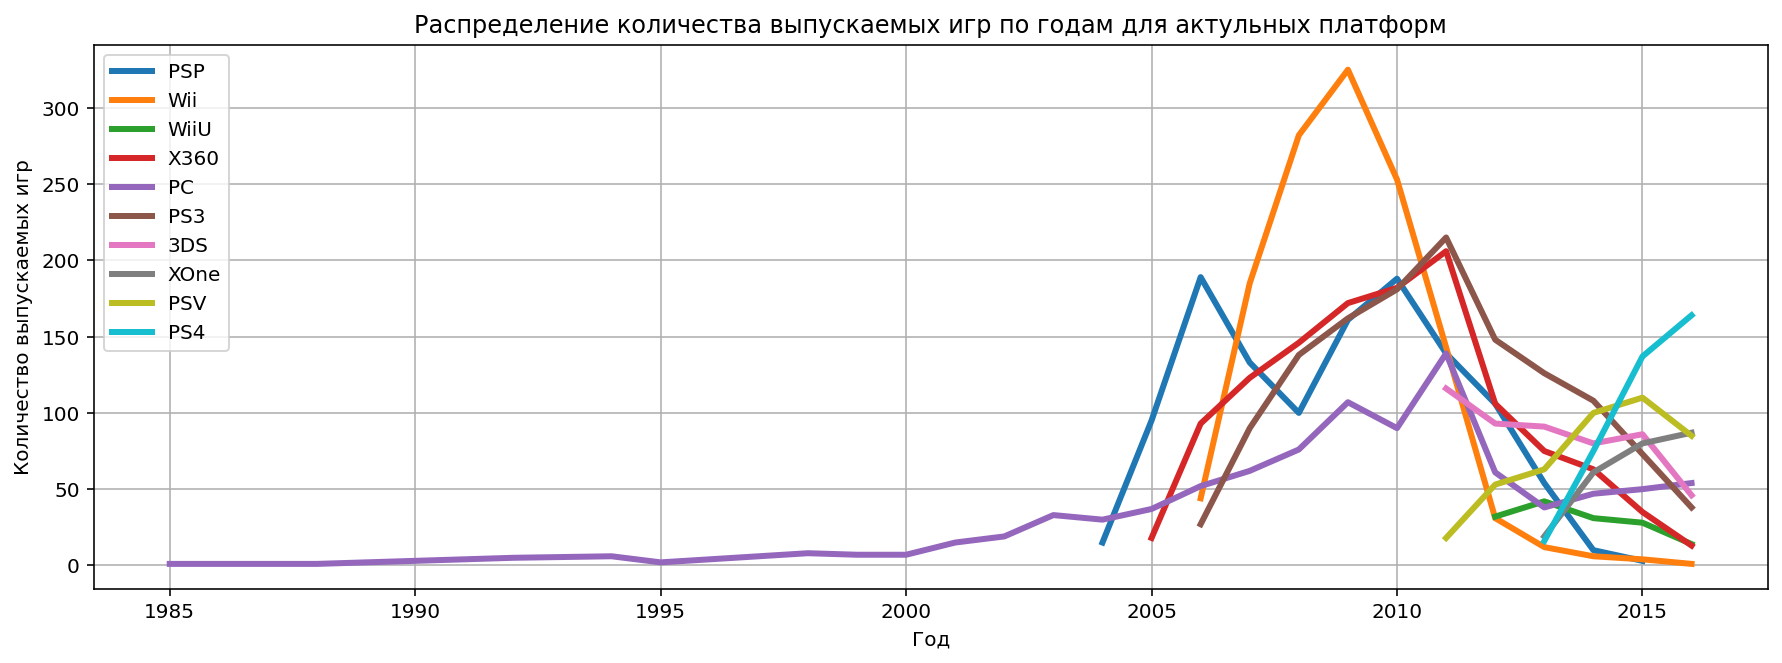

In [133]:
# запишем в переменную actual_platforms платформы, по которым выпускались игры с 2015 года
actual_platforms = df.query('year_of_release >= 2015').groupby('platform')['platform'].agg('count').sort_values().index

# построим график с распределением количества выпускаемых игр
for item in actual_platforms:
    plot = df.query('platform == @item').groupby('year_of_release')['name'].agg('count').plot(kind='line', title='Распределение количества выпускаемых игр по годам для актульных платформ', grid=True, figsize=(15, 5), linewidth=3)
plt.legend(actual_platforms)
plot.set_xlabel('Год')
plot.set_ylabel('Количество выпускаемых игр')
plt.show()

По графику видно, что актуальных платформ не так много. Лидерами по количеству выпускаемых игр в последние годы являются PS4, PSV, XOne.

Актуальным периодом возьмем период с 2013 года, когда стали появляться платформы, являющиеся сейчас лидерами по количеству выпускаемых игр.
Также представляется разумным исключить из данных платформы, по которым к 2016 году практически не выпускаются новые игры. Это платформы: PS3, Wii, WiiU, X360, PSP.

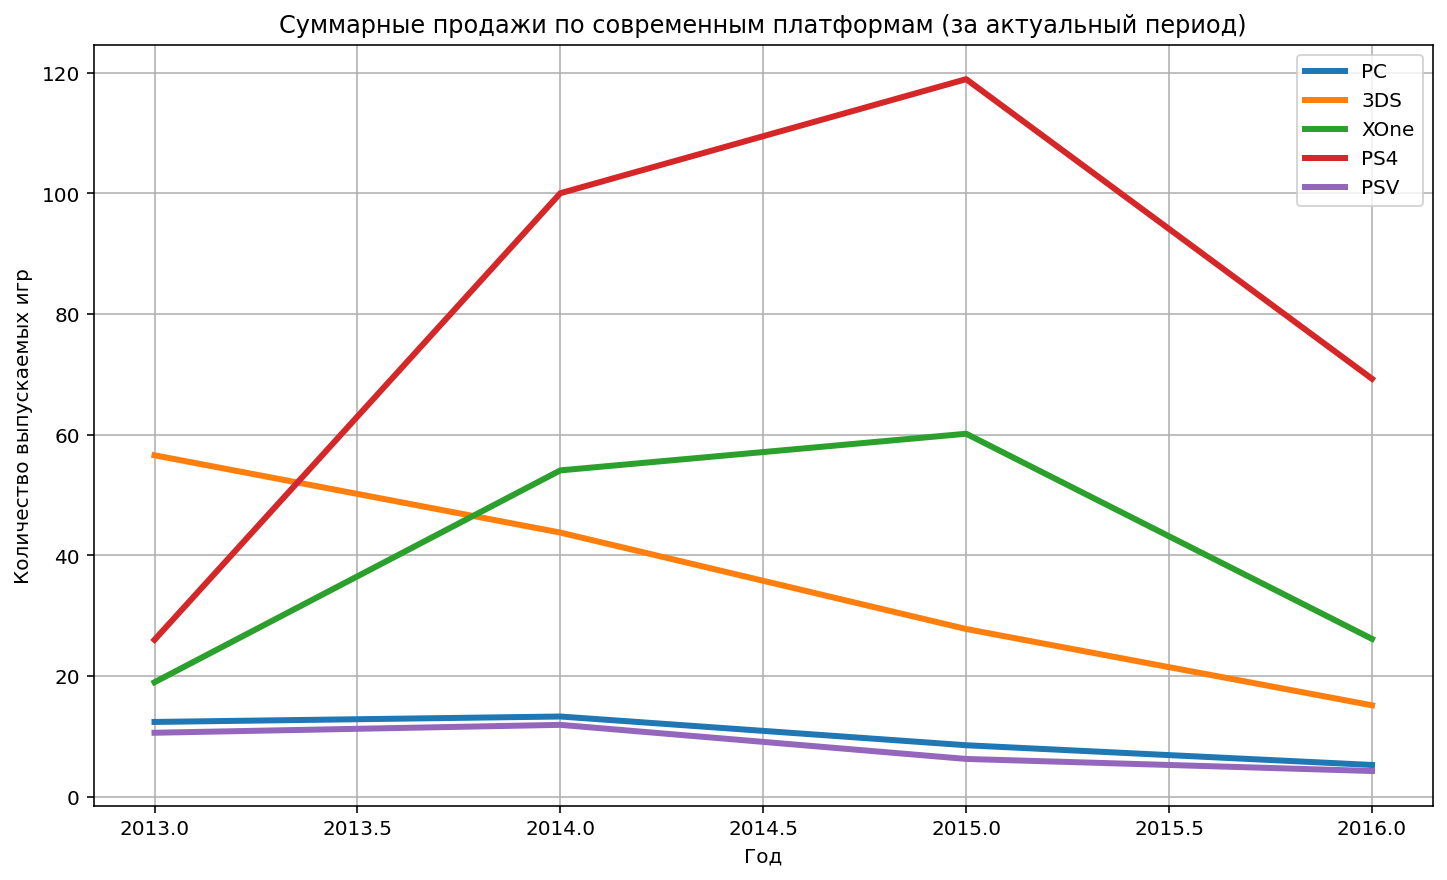

In [134]:
# Запишем в переменную только список актуальных платформ 
actual_platforms = ['PC','3DS','XOne','PS4','PSV']
# Запишем в отдельный датфрейм данные с 2013 года и включим только актульные платформы
df_actual = df.query('(year_of_release >= 2013)&(platform in @actual_platforms)')

# построим график с распределением суммарных продаж по актульным платформам
for item in actual_platforms:
    plot = df_actual.query('platform == @item').groupby('year_of_release')['overall_sales'].agg('sum').plot(kind='line', title='Суммарные продажи по современным платформам (за актуальный период)', grid=True, figsize=(12, 7), linewidth=3)
plt.legend(actual_platforms)
plot.set_xlabel('Год')
plot.set_ylabel('Количество выпускаемых игр')
plt.show()

Для начала необходимо пояснить, что данные по продажам игр, вышедших в 2016 году, не являются показательными в контексте сравнения с предыдущими периоды. Скорее всего это связано с тем, что на декабрь 2016 года имелась информация не за весь год, а только за его часть. Поэтому есть смысл в качестве последнего периода для сравнения брать 2015 год.

По суммарным продажам лидируют платформы PS4, XOne. По ним же продажи растут. По платформам 3DS, PC, PSV продажи падают.


### 3.4. Глобальные продажи игр в разбивке по платформам
Построим диаграммы размаха по суммарными продажам игр за актуальный период в разбивке по платформам

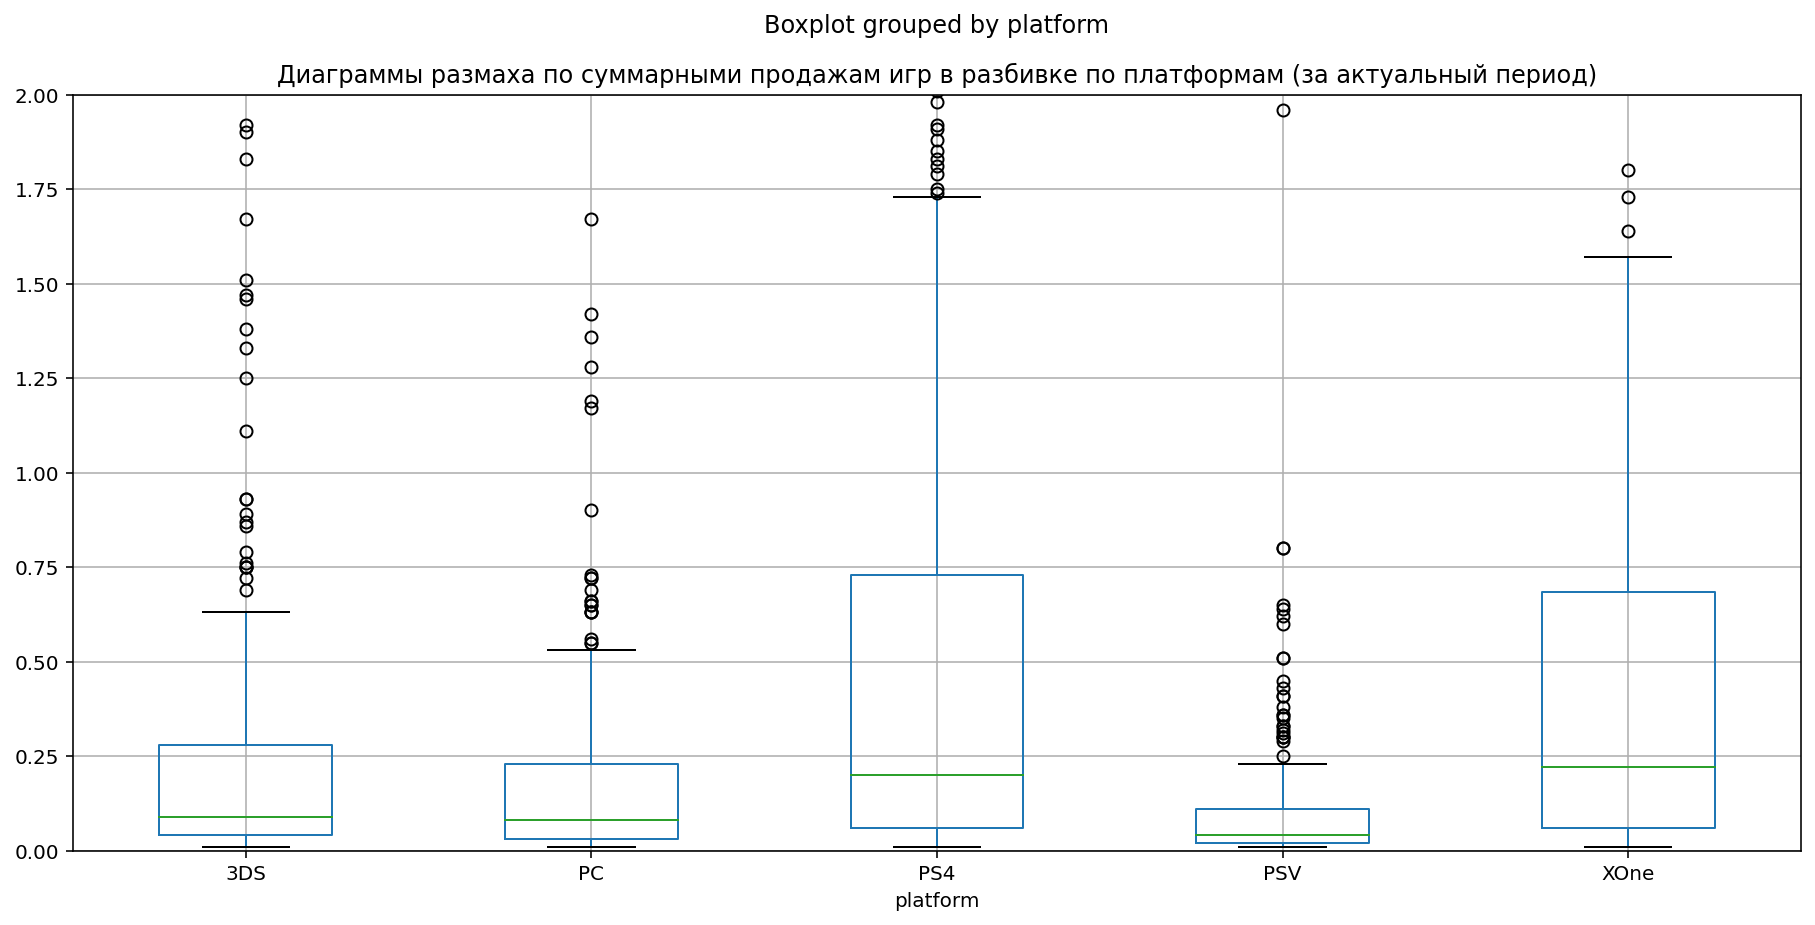

In [135]:
boxplot = df_actual.boxplot(column=['overall_sales'], figsize=(15, 7), by='platform')
plt.title('Диаграммы размаха по суммарными продажам игр в разбивке по платформам (за актуальный период)')
plt.ylim(0, 2)
plt.show()

Из данной диаграммы также видно, что перспективными платформами являются две - PS4 и XOne: это молодые платформы, являющиеся одними из лидеров по продажам в последние годы, и продажи по ним растут. 

### 3.5. Взаимосвязь между отзывами и продажами
Чтобы понять, есть ли связь между отзывами и продажами, построим диаграммы рассеяния и рассчитаем корреляцию между отзывами и суммарными продажами для одной из популярных платформ. Возьмем для исследования платформу PS4.

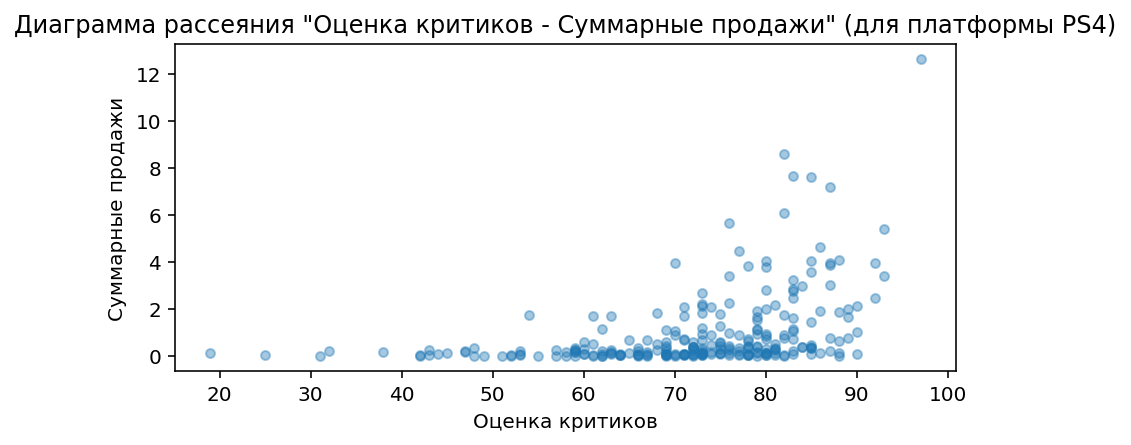

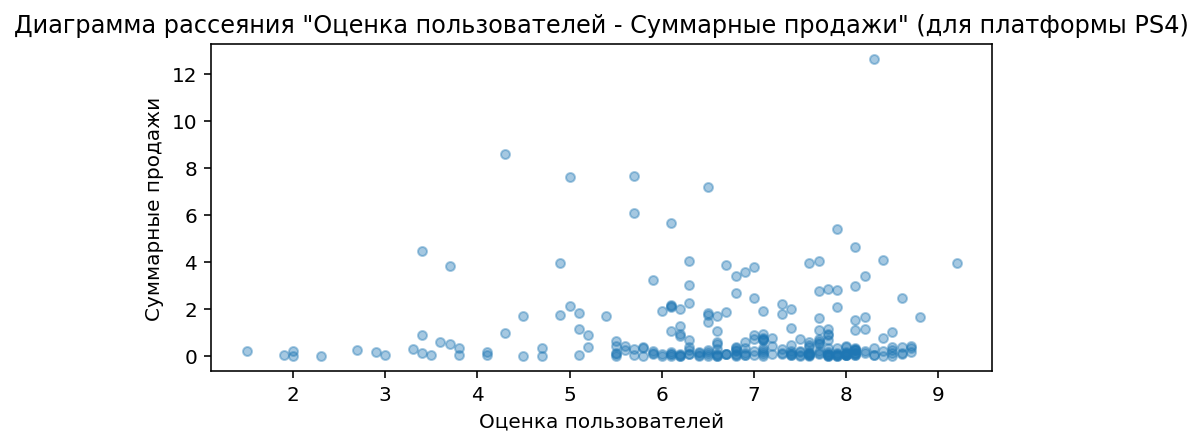

Коффициенты корреляции:
* Оценка критиков - Суммарные продажи: 0.40589480145836687
* Оценка пользователей - Суммарные продажи: -0.031957110204556424


In [136]:
# Создадим срез из актуальных данных по выбранной платформе
df_actual_ps4 = df_actual.query('(platform == "PS4") & user_score == user_score')
# Построим диаграммы рассеяния
plot = df_actual_ps4.plot(x='critic_score', y='overall_sales', kind='scatter', alpha=0.4, title = 'Диаграмма рассеяния "Оценка критиков - Суммарные продажи" (для платформы PS4)', figsize = (7,3))
plot.set_xlabel('Оценка критиков')
plot.set_ylabel('Суммарные продажи')
plt.show()
plot = df_actual_ps4.plot(x='user_score', y='overall_sales', kind='scatter', alpha=0.4, title = 'Диаграмма рассеяния "Оценка пользователей - Суммарные продажи" (для платформы PS4)', figsize = (7,3))
plot.set_xlabel('Оценка пользователей')
plot.set_ylabel('Суммарные продажи')
plt.show()
# Рассчитаем коффициенты корреляции:
print('Коффициенты корреляции:')
print('* Оценка критиков - Суммарные продажи:',df_actual_ps4['critic_score'].corr(df_actual_ps4['overall_sales']))
print('* Оценка пользователей - Суммарные продажи:',df_actual_ps4['user_score'].corr(df_actual_ps4['overall_sales']))

Полученный результат показывает, что для данной платформы суммарные продажи не зависят от оценок, которые выставляют пользователи (коэффициент корреляции близок к нулю). Оценки же критиков показывают большую связь с суммарными продажами (коэффициент корреляции около 0.4), но она также достаточно слабая.

Попробуем рассчитать аналогичные показатели для остальных платформ (не PS4) и сравним их.

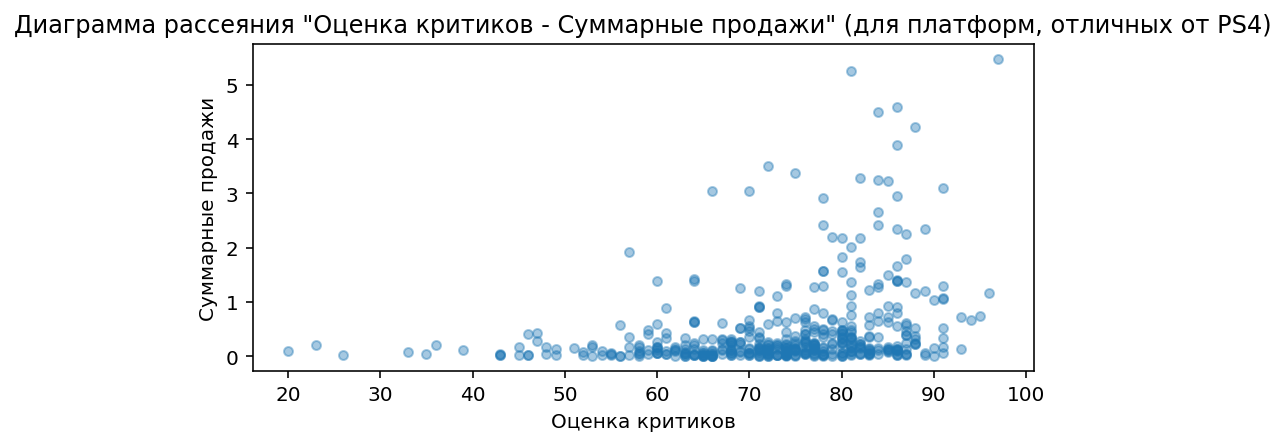

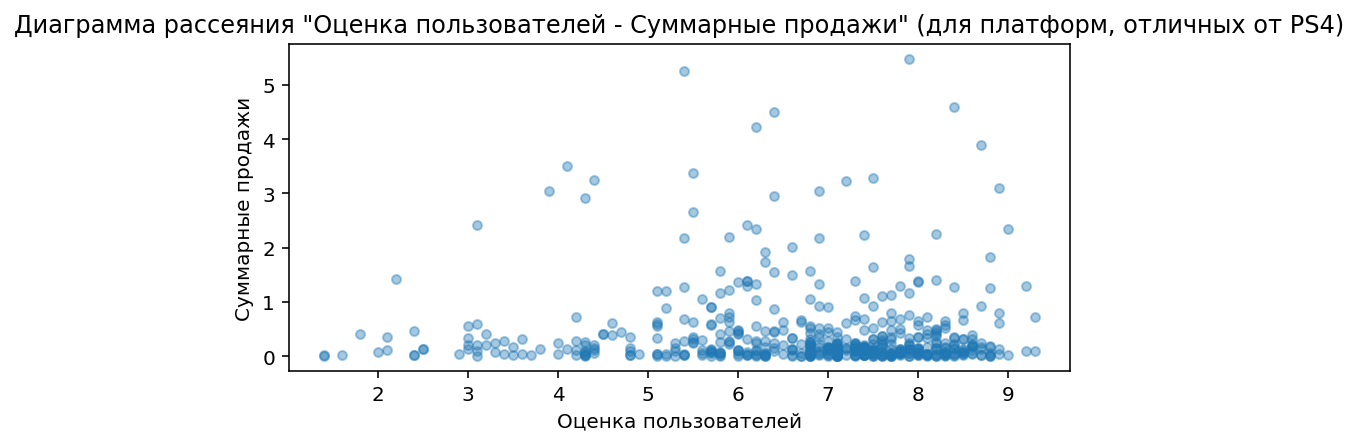

Коффициенты корреляции:
* Оценка критиков - Суммарные продажи: 0.29251236250396917
* Оценка пользователей - Суммарные продажи: -0.02681002730188761


In [137]:
# Создадим срез из актуальных данных по платформе, отличной от выбранной
df_actual_ps4_no = df_actual.query('(platform != "PS4") & user_score == user_score')
# Построим диаграммы рассеяния
plot = df_actual_ps4_no.plot(x='critic_score', y='overall_sales', kind='scatter', alpha=0.4, title = 'Диаграмма рассеяния "Оценка критиков - Суммарные продажи" (для платформ, отличных от PS4)', figsize = (7,3))
plot.set_xlabel('Оценка критиков')
plot.set_ylabel('Суммарные продажи')
plt.show()
plot = df_actual_ps4_no.plot(x='user_score', y='overall_sales', kind='scatter', alpha=0.4, title = 'Диаграмма рассеяния "Оценка пользователей - Суммарные продажи" (для платформ, отличных от PS4)', figsize = (7,3))
plot.set_xlabel('Оценка пользователей')
plot.set_ylabel('Суммарные продажи')
plt.show()
# Рассчитаем коффициенты корреляции:
print('Коффициенты корреляции:')
print('* Оценка критиков - Суммарные продажи:',df_actual_ps4_no['critic_score'].corr(df_actual_ps4_no['overall_sales']))
print('* Оценка пользователей - Суммарные продажи:',df_actual_ps4_no['user_score'].corr(df_actual_ps4_no['overall_sales']))

Полученный результат аналогичен полученному для PS4.

### 3.6. Общее распределение игр по жанрам
Посмотрим, каких игр выпущено больше всего за актуальный период.

AxesSubplot(0.125,0.125;0.775x0.755)


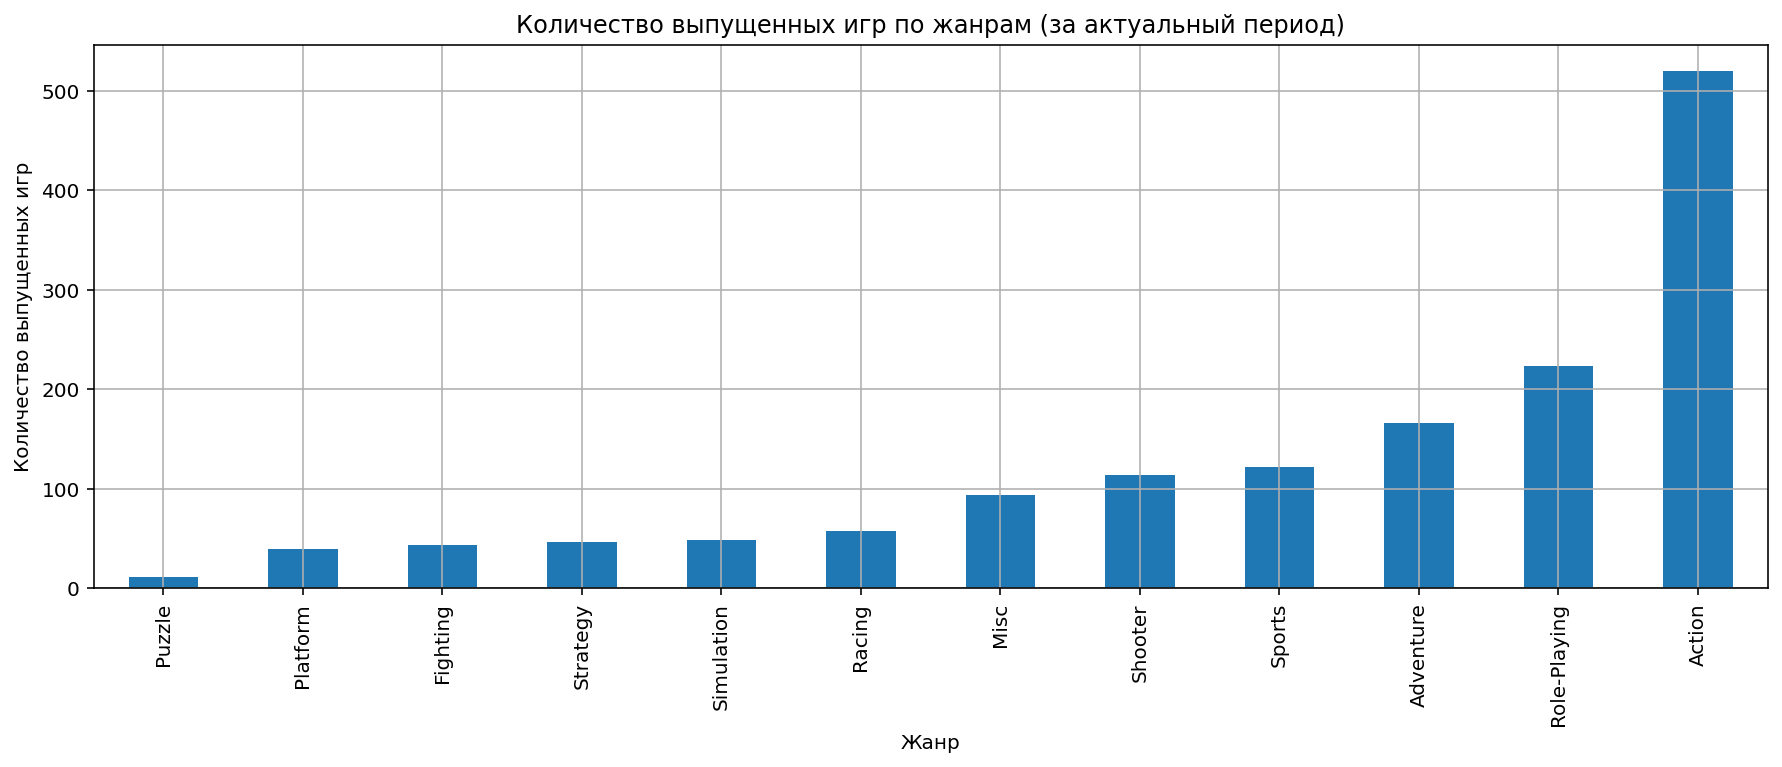

In [138]:
plot = df_actual.groupby('genre')['genre'].agg('count').sort_values().plot(kind='bar', title='Количество выпущенных игр по жанрам (за актуальный период)', grid=True, figsize=(15, 5))
plot.set_xlabel('Жанр')
plot.set_ylabel('Количество выпущенных игр')
print(plot)

Несомненным лидером по количеству выпущенных игр является жанр Action.

Посмотрим, какие жанры являются лидеры по продажам:

AxesSubplot(0.125,0.125;0.775x0.755)


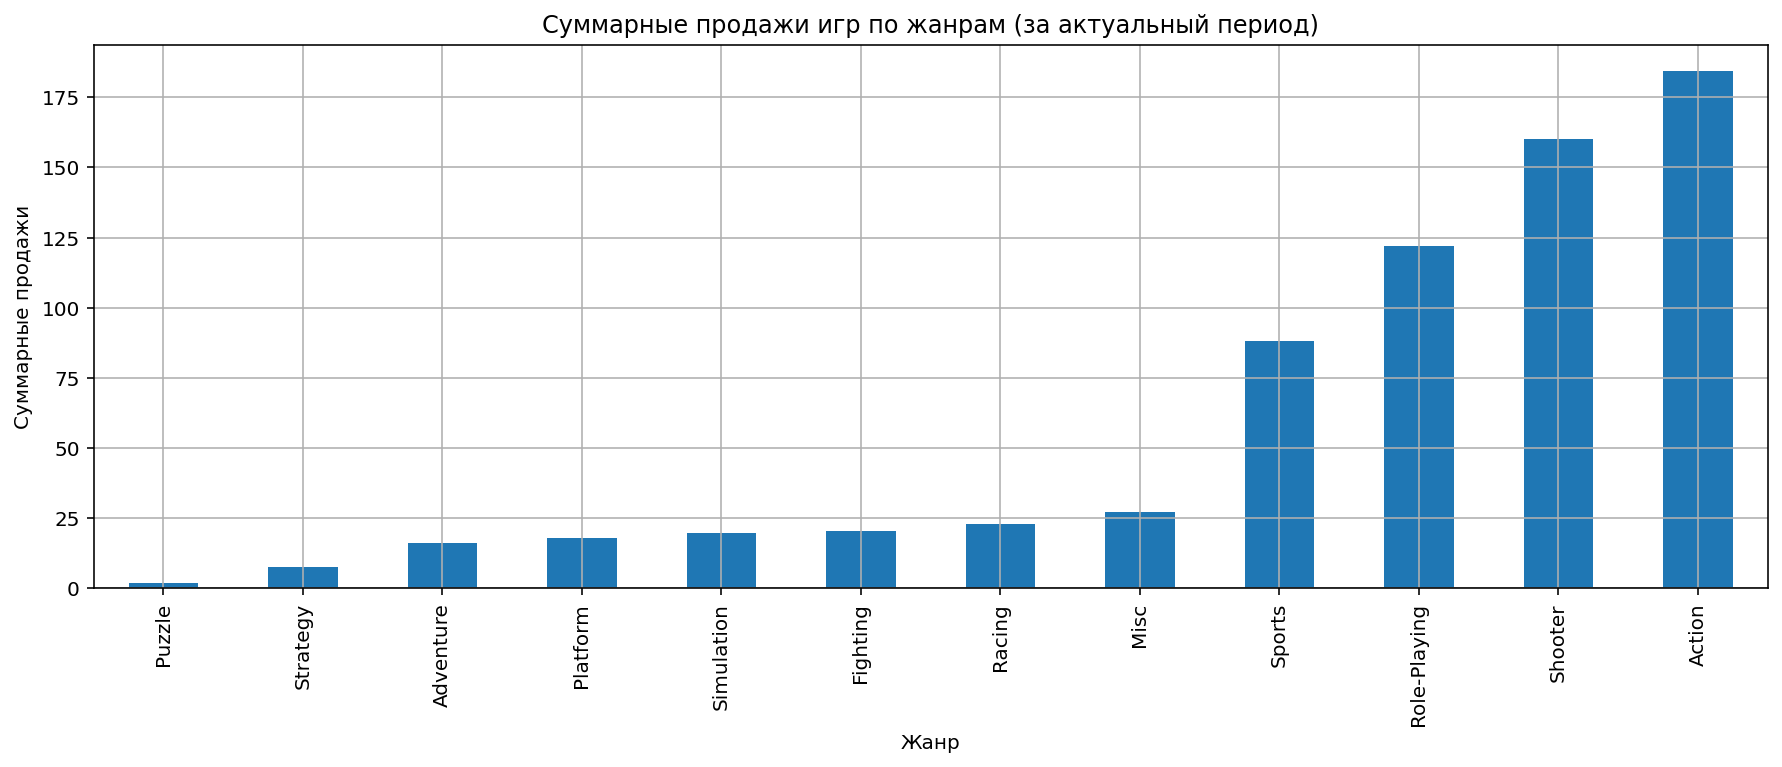

In [139]:
plot = df_actual.groupby('genre')['overall_sales'].agg('sum').sort_values().plot(kind='bar', title='Суммарные продажи игр по жанрам (за актуальный период)', grid=True, figsize=(15, 5))
plot.set_xlabel('Жанр')
plot.set_ylabel('Суммарные продажи')
print(plot)

По суммарным продажам лидером снова оказался жанр Action. Также сильно выделился жанр Shooter, хотя по количеству выпущенных игр он был в середеине списка. В конце же списка также, как и по количеству выпущенных игр, находятся жанры Puzzle и Strategy. А жанр Adventure по суммарным продажам оказался почти в самом конце, хотя по количеству выпущенных игр является одним из лидеров.
Чтобы понять, игры какого жанра дают наибольшую отдачу в виде продаж, рассчитаем средние продажи на одну игру по жанрам:

AxesSubplot(0.125,0.125;0.775x0.755)


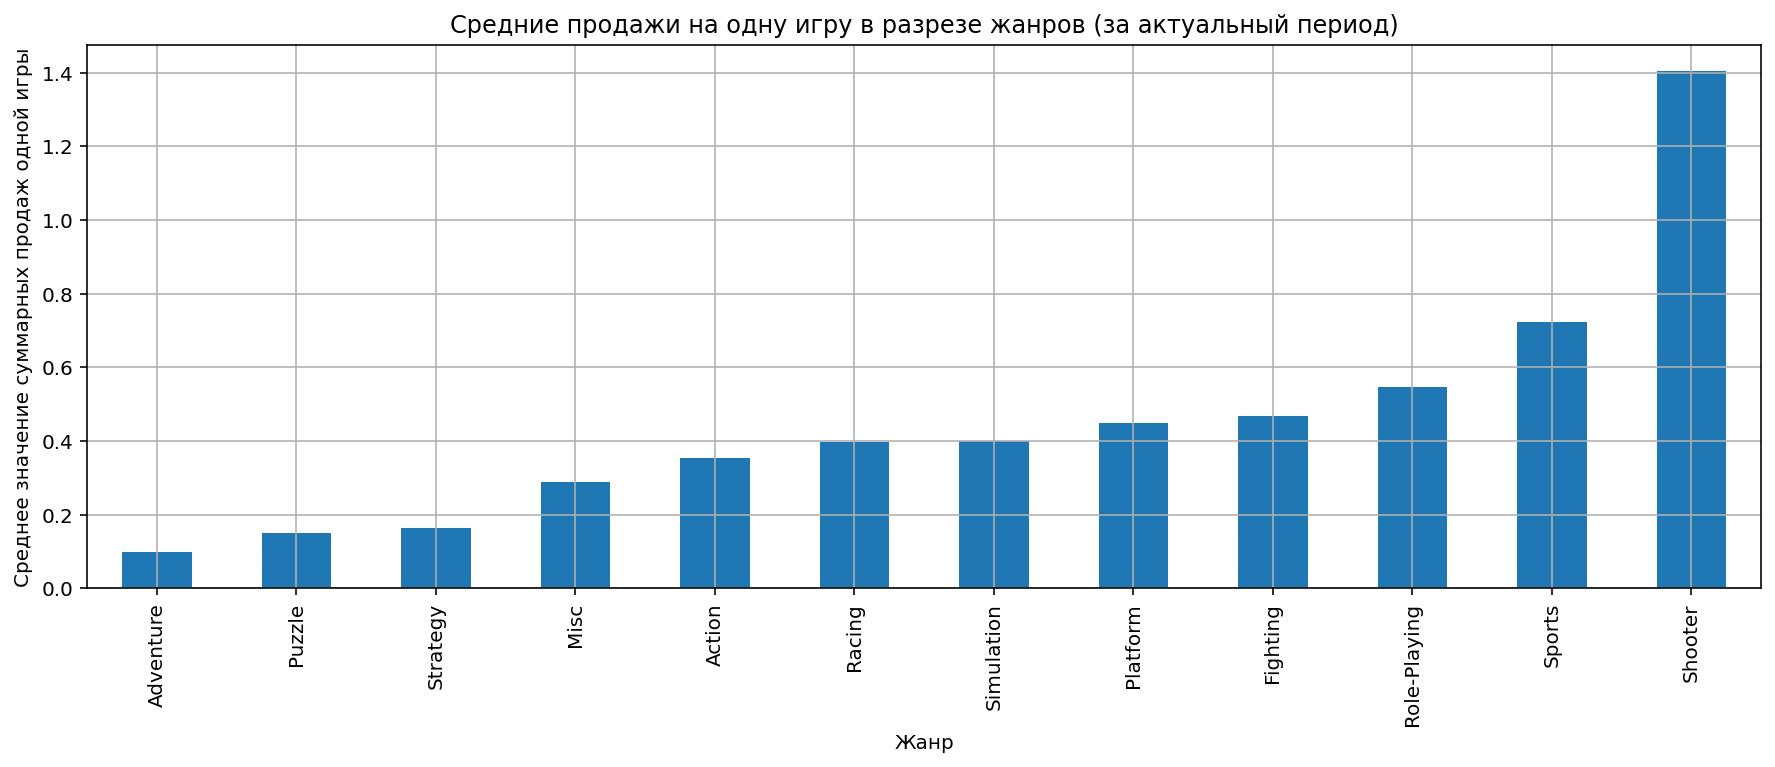

In [140]:
plot = df_actual.groupby('genre')['overall_sales'].agg('mean').sort_values().plot(kind='bar', title='Cредние продажи на одну игру в разрезе жанров (за актуальный период)', grid=True, figsize=(15, 5))
plot.set_xlabel('Жанр')
plot.set_ylabel('Среднее значение суммарных продаж одной игры')
print(plot)

Здесь резко выделяется жанр Shooter. А жанр Action по средним продажам одной игры оказался далеко от первого места. Т.е. этот жанр оказался лидером по суммарным продажам из-за большого количества выпущенных игр. Игры жанра Adventure в среднем дают наименьшие продажи.

### Выводы по шагу 3
По результатам проведенного исследовательского анализа можно сделать следующие выводы:
1. По количеству выпускаемых компьютерных игр пик в данной индустрии приходится на период 2007-2011 годов. В последние годы выпускается заметно меньше игр.
2. Изучение самых популярных игровых платформ показало, что срок жизни платформы составляет около 10 лет.
3. Для построения прогноза на 2017 год выделен актуальный период с 2011 года. С этого времени на рынке появляются новые платформы, которые еще набирают популярность в 2016 году.
4. Наиболее перспективными платформами являются две - PS4 и Xone: это молодые платформы, являющиеся одними из лидеров по продажам в последние годы, и продажи по ним растут.
5. Изучено влияние отзывов критиков и пользователей на суммарные продажи. Оказалось, что суммарные продажи не зависят от оценок, которые выставляют пользователи (коэффициент корреляции близок к нулю). Оценки же критиков показывают большую связь с суммарными продажами , но она также достаточно слабая (коэффициент корреляции около 0.4).
6. Самыми прибыльными по суммарным продажам жанрами являются Action и Shooter. При этом жанр Action является таковым из-за большого количества выпускаемых игр, средняя продажа одной игры небольшая. Жанр Shooter оказался в лидерах из-за больших продаж, приходящихся на одну игру, в то время как выпускается таких игр немного. Наименее прибыльными жанрами оказались - Puzzle, Strategy, Adventure. Причем игр жанра Adventure выпускается достаточно много.

## 4. Составление портрета пользователя каждого региона <a class="anchor" id="h1_4"></a>
Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Влияет ли рейтинг ESRB на продажи в отдельном регионе

### 4.1. Самые популярные платформы (топ-5)
Посчитаем для каждого региона 5 самых популярных игровых платформ.

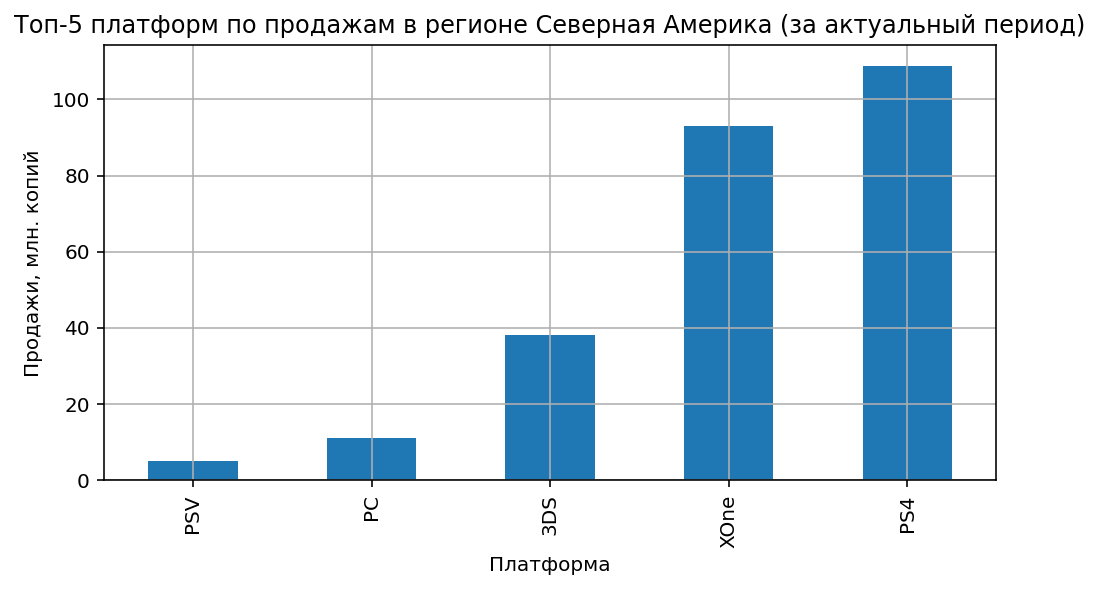

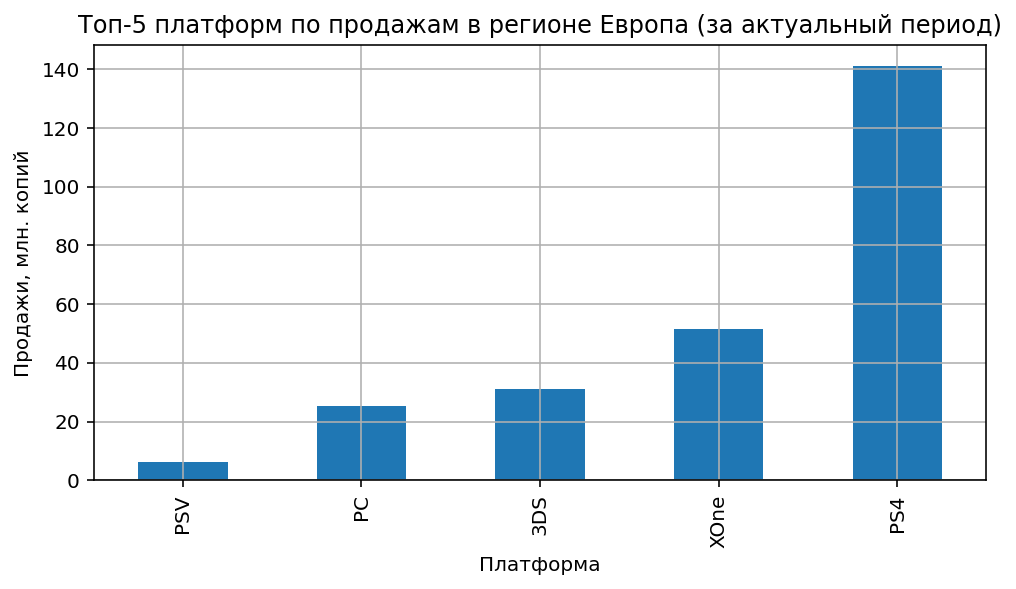

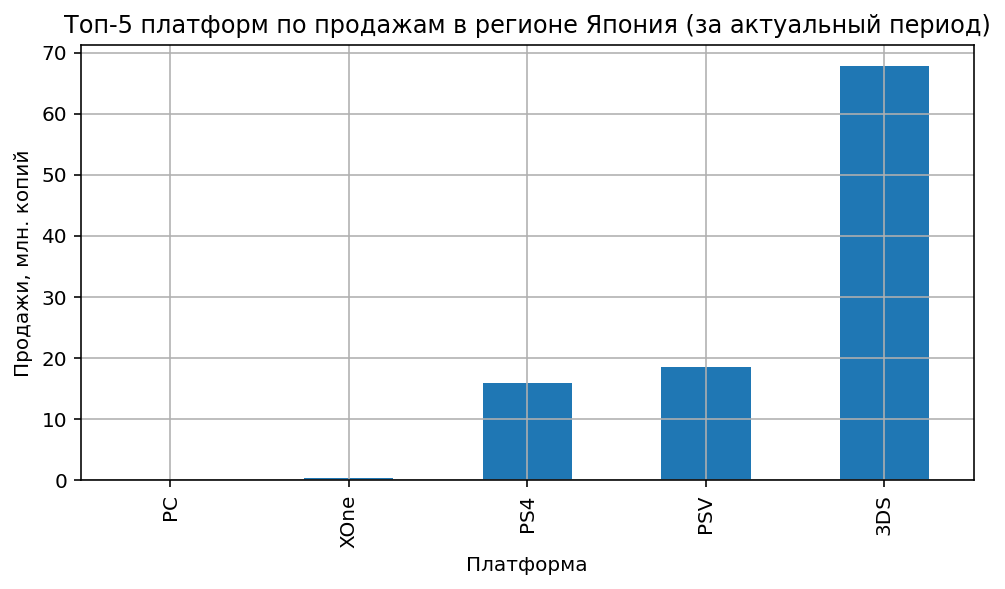

In [141]:
regions_dict = {'Северная Америка': 'na_sales', 'Европа': 'eu_sales', 'Япония': 'jp_sales'}
for key, value in regions_dict.items():
    plot = df_actual.groupby('platform')[value].agg('sum').sort_values().tail().plot(kind='bar', grid=True, figsize=(8, 4), stacked=True)
    plot.set_xlabel('Платформа')
    plot.set_ylabel('Продажи, млн. копий')
    plt.title('Топ-5 платформ по продажам в регионе {} (за актуальный период)'.format(key))
    plt.show()


Чтобы наглядно увидеть, какую долю по той или иной платформе занимают продажи в разных регионах, построим совмещенную диаграмму:

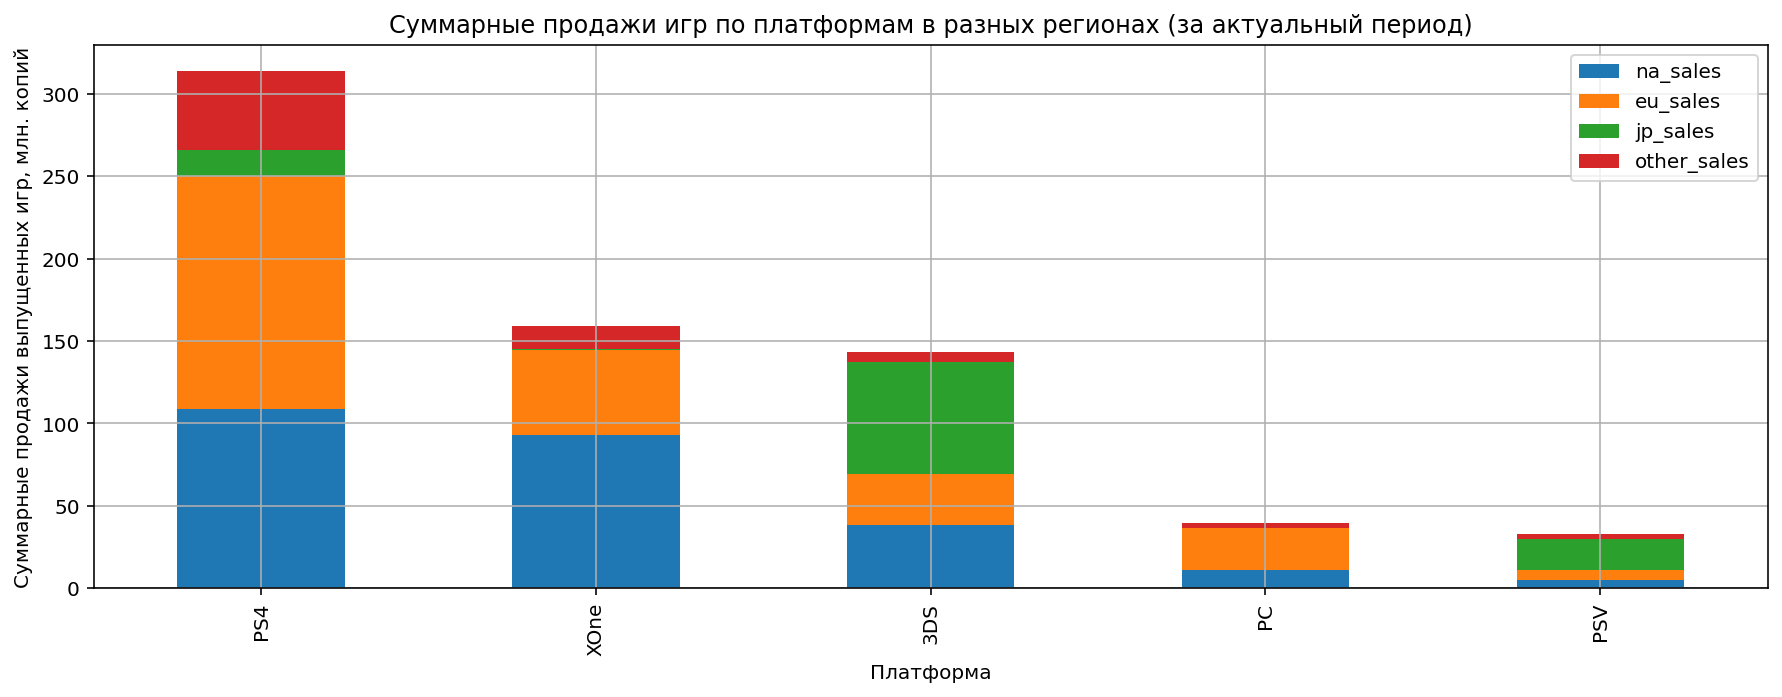

In [142]:
plot = df_actual.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales']].agg('sum').sort_values(by='na_sales',ascending=False).plot(kind='bar', title='Суммарные продажи игр по платформам в разных регионах (за актуальный период)', grid=True, figsize=(15, 5), stacked=True)
plot.set_xlabel('Платформа')
plot.set_ylabel('Суммарные продажи выпущенных игр, млн. копий')
plt.show()

В каждом регионе доли продаж по игровым платформам значительно отличаются:

* В Северной Америке и Европе лидирует платформа PS4 от мирового гиганта Sony. На втором месте платформа Xbox One от американской компании Microsoft. Причем больше половины всех продаж игр по данной платформе относится к Северной Америке: видно предпочтение части пользователей местному продукту.

* В Японии лидириет платформа 3DS от местной компании Nintendo. Япония составляет половину продаж по этой платформе.


### 4.2. Самые популярные жанры (топ-5)
Теперь составим список топ-5 самых популярных жанров в разрезе регионов.

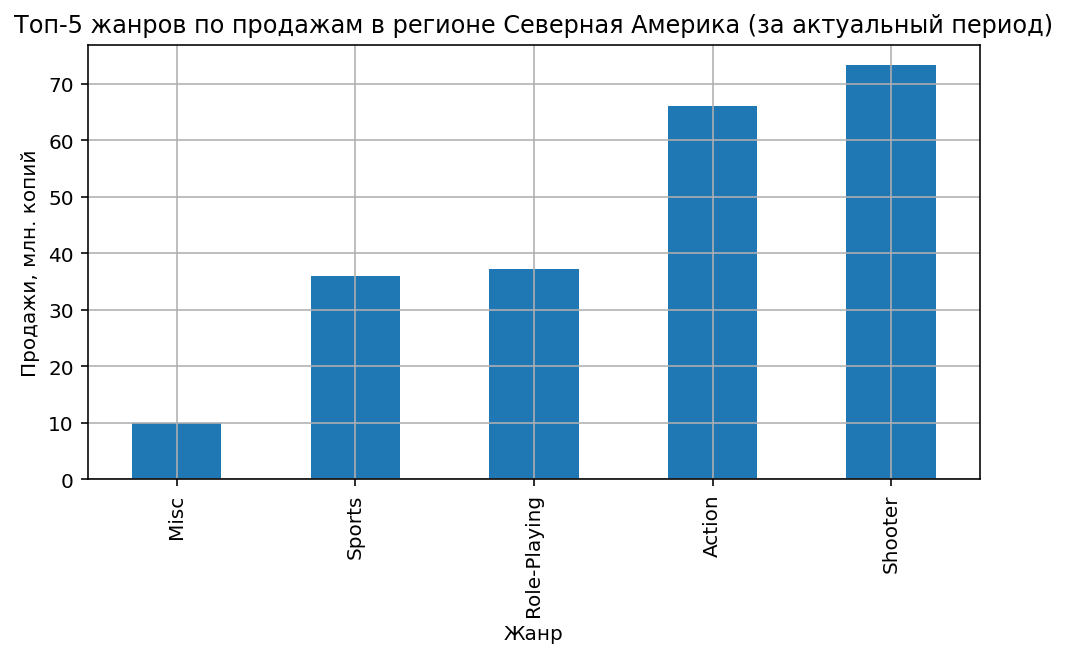

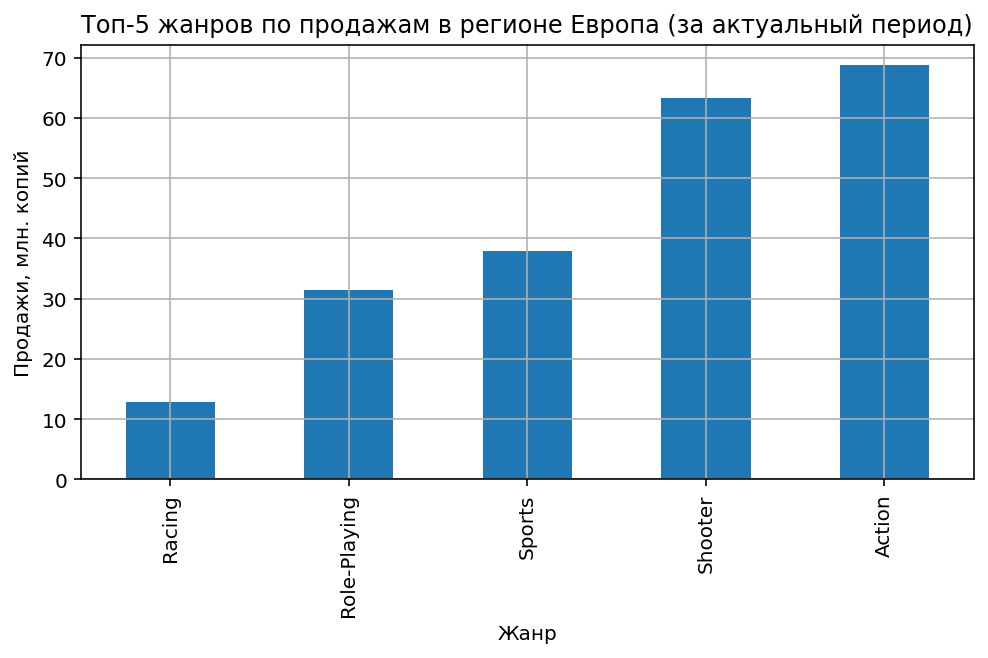

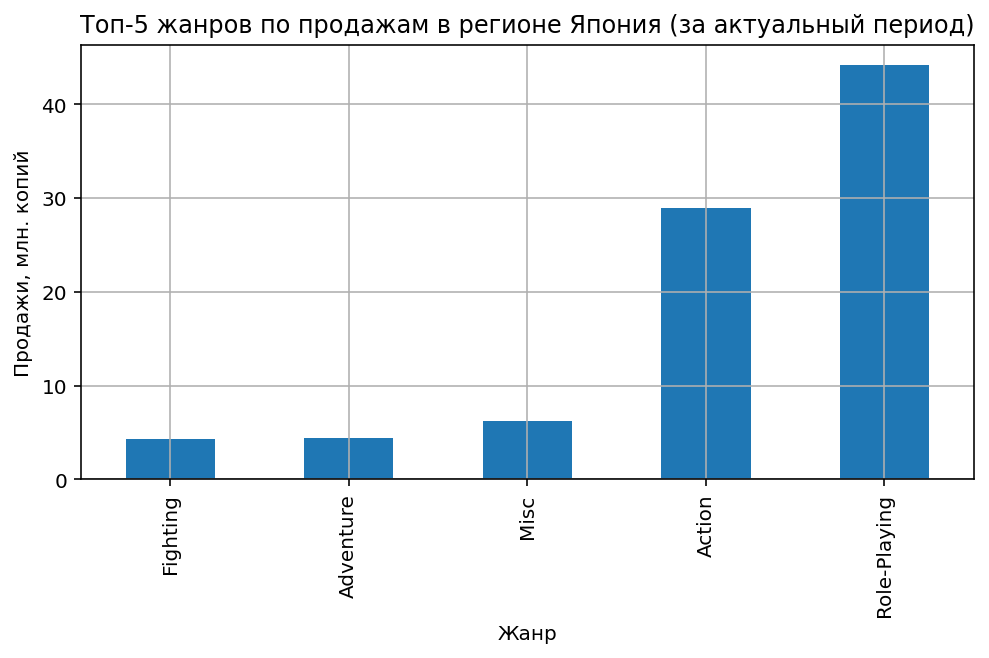

In [143]:
for key, value in regions_dict.items():
    plot = df_actual.groupby('genre')[value].agg('sum').sort_values().tail().plot(kind='bar', grid=True, figsize=(8, 4), stacked=True)
    plot.set_xlabel('Жанр')
    plot.set_ylabel('Продажи, млн. копий')
    plt.title('Топ-5 жанров по продажам в регионе {} (за актуальный период)'.format(key))
    plt.show()

Для понимания общей картины распределения продаж по жанрам с долями регионов, построим совмещенную диаграмму:

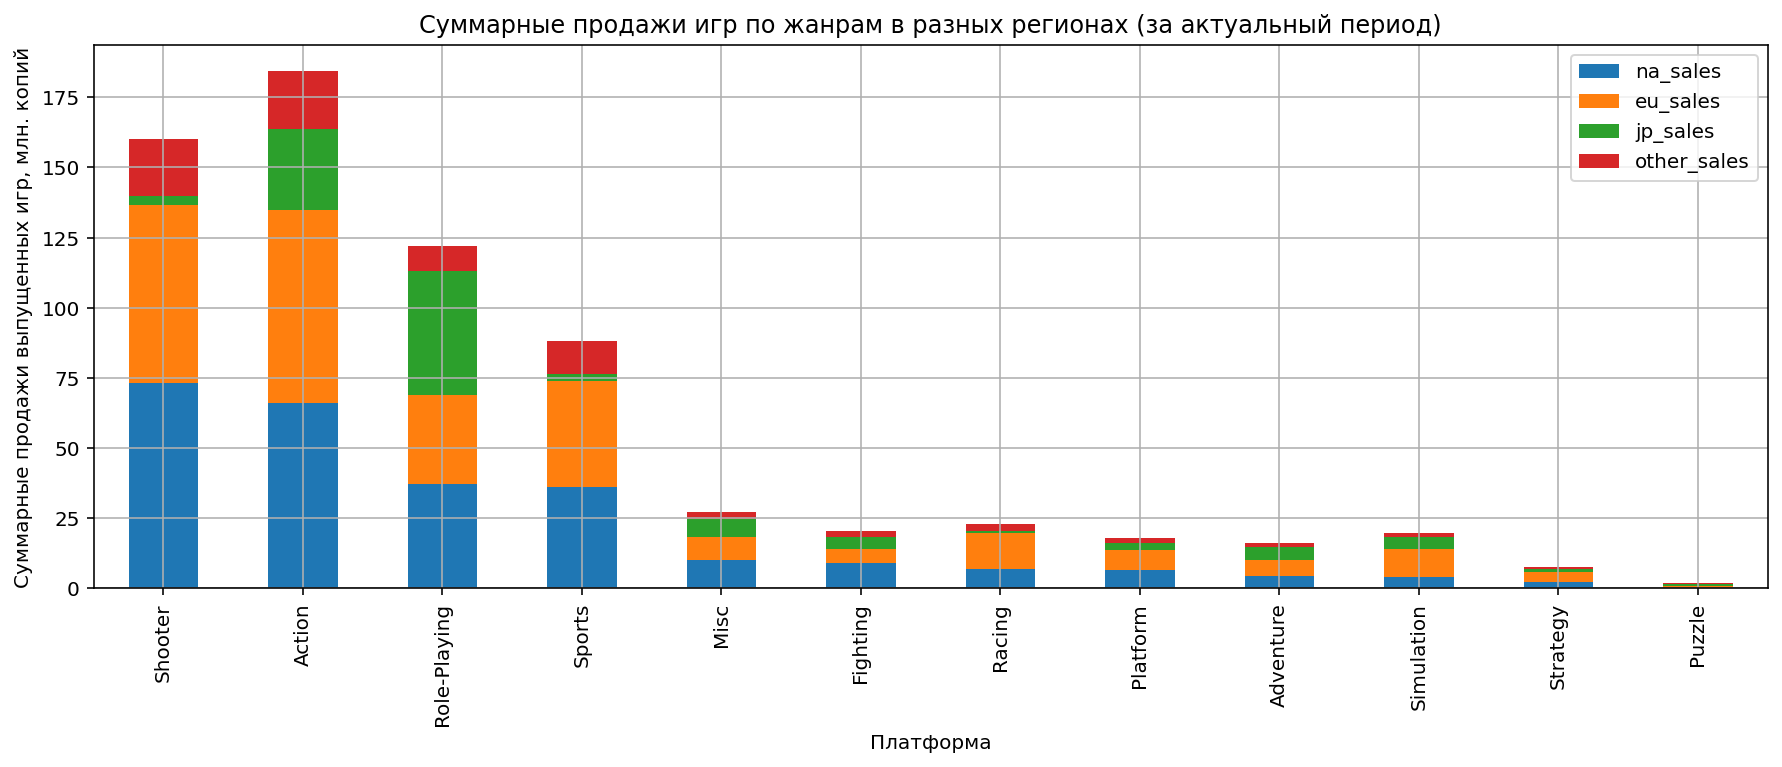

In [144]:
plot = df_actual.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].agg('sum').sort_values(by='na_sales',ascending=False).plot(kind='bar', title='Суммарные продажи игр по жанрам в разных регионах (за актуальный период)', grid=True, figsize=(15, 5), stacked=True)
plot.set_xlabel('Платформа')
plot.set_ylabel('Суммарные продажи выпущенных игр, млн. копий')
plt.show()

По этим данным видно, что:
* Пользователи Европы и Северной Америки схожи в предпочтениях по жанрам игр. В обоих регионах одна и та же четверка лидеров: Action, Shooter, Sports, Role-Playing
* У пользователей Японии вкусы отличаются: жанры Shooter и Sports непопулярны, ролевые игры (Role-Playing) занимают значительно большую долю. Также среди лидеров в появился жанр Fighting ("Бой").

### 4.3. Влияние рейтинга ESRB на продажи в регионах
Построим графики с распределением продаж по рейтингу в каждом регионе.

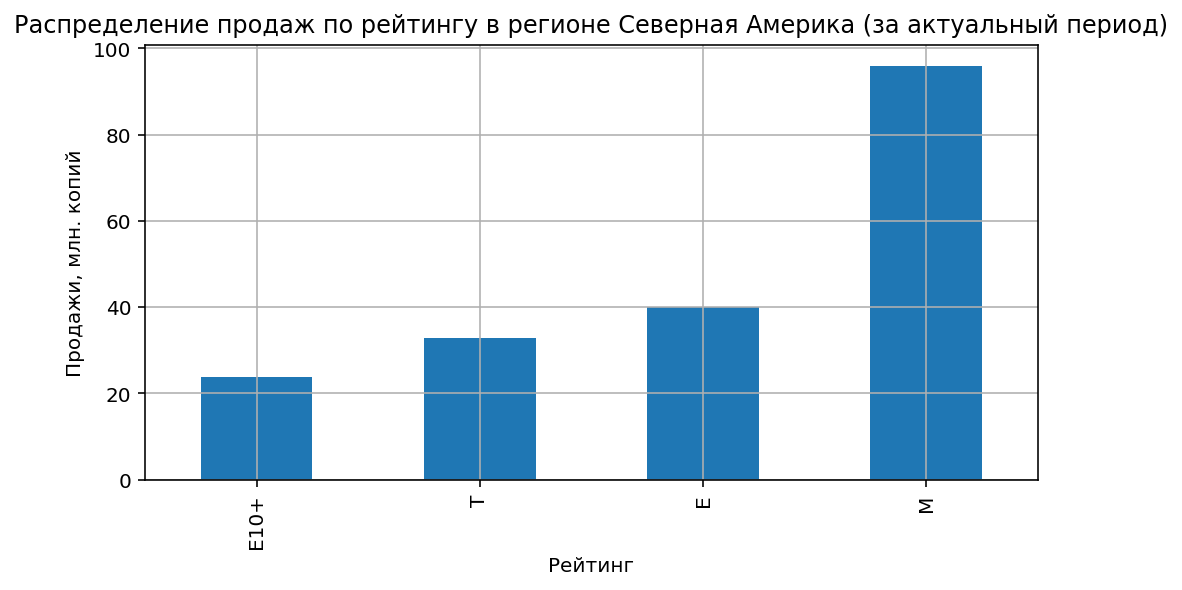

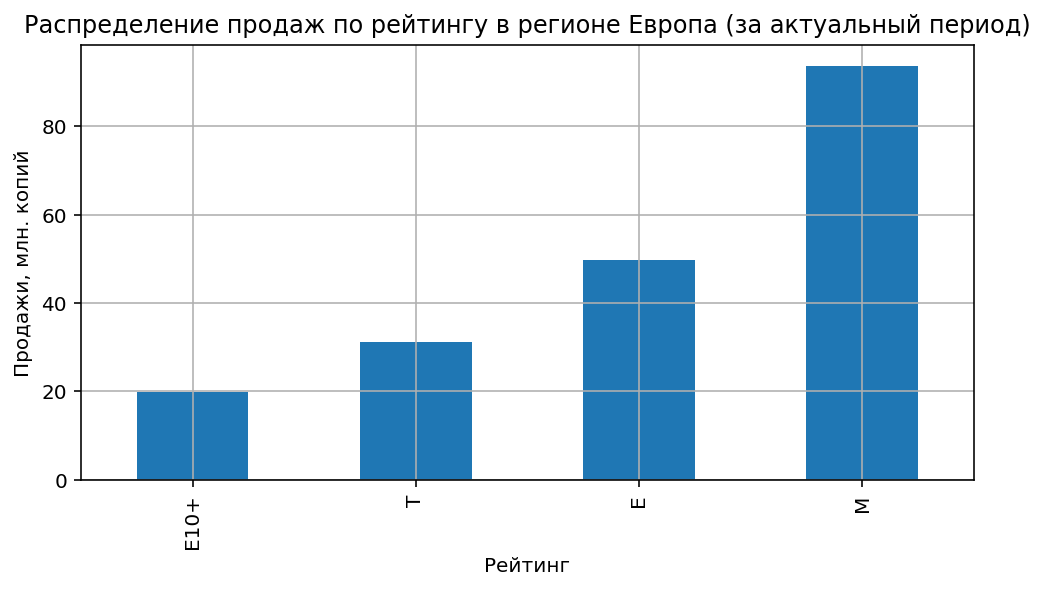

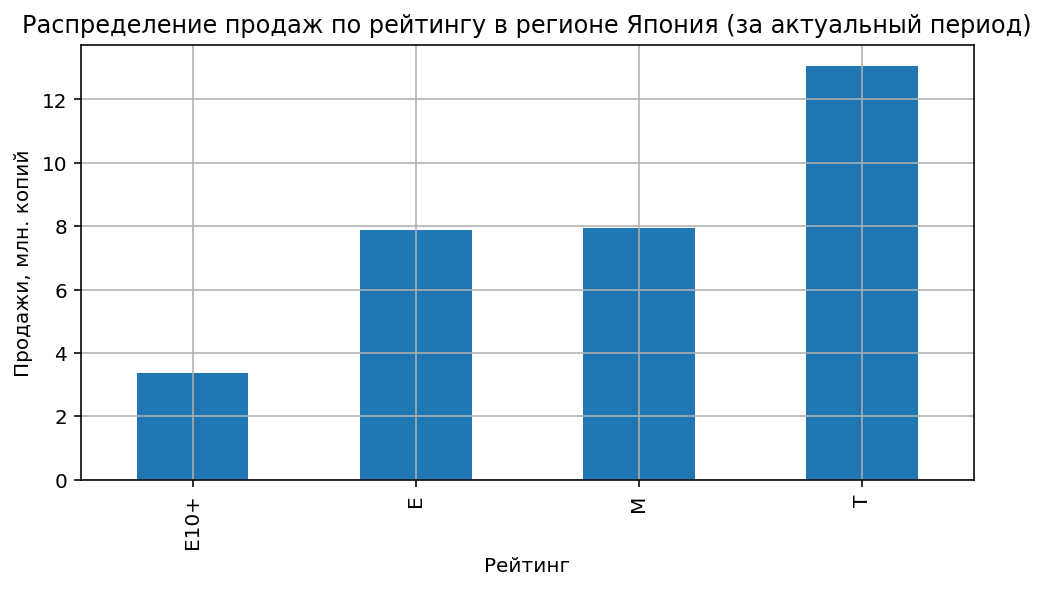

In [145]:
for key, value in regions_dict.items():
    plot = df_actual.groupby('rating')[value].agg('sum').sort_values().tail().plot(kind='bar', grid=True, figsize=(8, 4), stacked=True)
    plot.set_xlabel('Рейтинг')
    plot.set_ylabel('Продажи, млн. копий')
    plt.title('Распределение продаж по рейтингу в регионе {} (за актуальный период)'.format(key))
    plt.show()

Для понимания общей картины распределения продаж по рейтингам с долями регионов, построим совмещенную диаграмму:

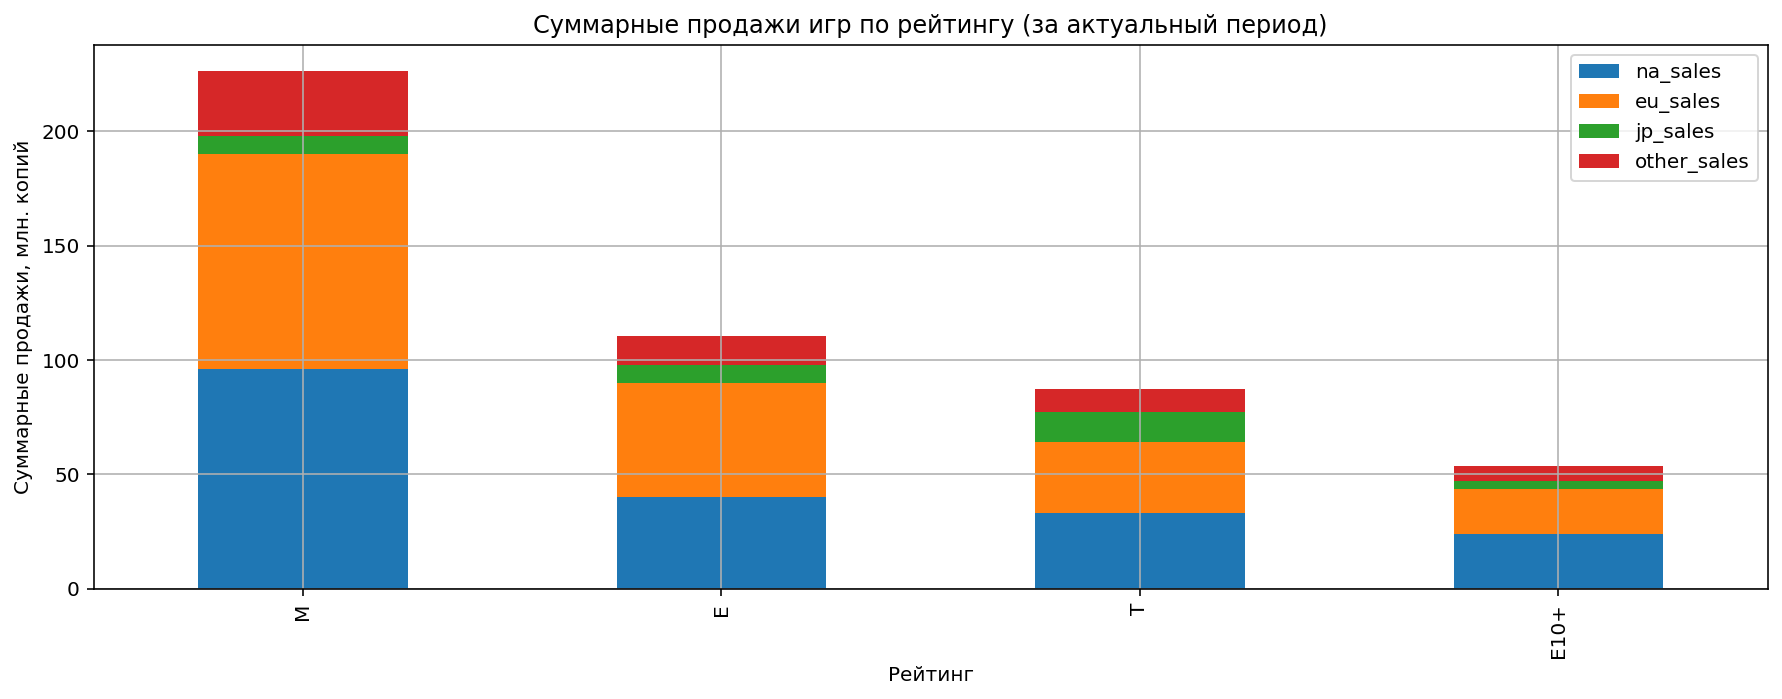

In [146]:
plot = df_actual.groupby('rating')[['na_sales','eu_sales','jp_sales', 'other_sales']].agg('sum').sort_values(by='eu_sales',ascending=False).plot(kind='bar', title='Суммарные продажи игр по рейтингу (за актуальный период)', grid=True, figsize=(15, 5), stacked=True)
plot.set_xlabel('Рейтинг')
plot.set_ylabel('Суммарные продажи, млн. копий')
plt.show()

Согласно полученным данным можно увидеть, что пользователи в отличаются в разных регионах:
* Значительная часть пользователей Северной Америки и Европы покупают игры для взрослых (рейтинг «M»).
* Среди пользователей Японии больше доля у рейтингов «E» (Everyone - для всех) и «T» (Teen - подросткам). Скорее всего это связано с тем, что в Японии аудитория младше, чем в других рассматриваемых регионах.

### Выводы по шагу 4
На основе изучения данных в разрезе регионов можно составить портрет пользователей каждого региона:
1. Пользователи Северной Америки и Европы предпочитают предпочитают платформы мировых лидеров в игровой индустрии (Sony Play Station 4 и Microsoft Xbox One). Пользователи Японии предпочитают платформы местного производства (Nintendo 3DS, Sony Play Station Vita и 4).
2. Пользователи Северной Америки и Европы предпочитают игры одного и того же жанра, причем в схожих пропорциях: Action, Shooter, Sports, Role-Playing. Препочтения пользователей Японии другие: они предпочитают жанры Role-Playing, Action и Fighting. Причем на ролевые игры приходится значительно большая доля аудитории, чем в других регионах.
3. Возрастная категория: Северная Америка и Европа - преобладает взрослая аудитория (старше 17 лет), Япония - в основном подростки.

## Шаг 5. Проверка гипотез <a class="anchor" id="h1_5"></a>
На данном шаге нам необходимо проверить следующие гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотез воспользуемся методом, который возвращает статистику разности между средними значениями. В обоих гипотезах мы будем сравнивать между собой средние двух генеральных совокупностей, поэтому будем использовать метод `scipy.stats.ttest_ind()`.

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сначала сформулируем нулевую гипотезу. Она всегда формулируется так, чтобы использовать знак равенства. Поэтому нулевая гипотеза будет звучать следующим образом:

Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Тогда альтернативная гипотеза будет звучать так:

Н1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Рассчитаем средние значения пользовательских рейтингов и их дисперсии:

In [147]:
# Создадим два датафрейма с данными по каждой платформе.
# Условием user_score == user_score из выборки исключаются записи с пустым значением user_score
xone = df_actual.query('(platform == "XOne") & user_score == user_score')
pc = df_actual.query('(platform == "PC") & user_score == user_score')

# Отключение SettingWithCopyWarning (взято отсюда https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas )
pd.options.mode.chained_assignment = None

# Преобразуем тип колонок user_score
xone['user_score'] = xone['user_score'].astype('float')
pc['user_score'] = pc['user_score'].astype('float')

# Рассчитаем среднее значение и дисперсию для каждой группы
print('Cредний пользовательский рейтинг для платформы Xbox One: {:.1f}'.format(xone['user_score'].mean()))
print('Дисперсия пользовательского рейтинга для платформы Xbox One: {:.1f}'.format(xone['user_score'].var()))
print('Cредний пользовательский рейтинг для платформы PC: {:.1f}'.format(pc['user_score'].mean()))
print('Дисперсия пользовательского рейтинга для платформы PC: {:.1f}'.format(pc['user_score'].var()))

Cредний пользовательский рейтинг для платформы Xbox One: 6.5
Дисперсия пользовательского рейтинга для платформы Xbox One: 1.9
Cредний пользовательский рейтинг для платформы PC: 6.3
Дисперсия пользовательского рейтинга для платформы PC: 3.0


Средние пользовательские рейтинги получились схожими, а дисперсии значительно отличаются. Но такие результаты могли получиться случайно. Осуществим проверку сформулированной гипотезы.

Сначала проверим выборки на гомогенность дисперсий сравниваемых выборок. Для этого будем использовать тест Левина.
Если p-уровень значимости будет меньше критического для нас уровня статистической значимости, то при проверке нулевой гипотезы необходимо использовать t-критерий Уэлча (использовать параметр `equal_var = False`).

In [148]:
# Зададим критический уровень статистической значимости
alpha = .05

# Проведем тест Левина и посчитаем p-значение
results_var_test = st.levene(xone['user_score'], pc['user_score'], center='mean')

# Выведем на экран полученное p-значение для теста Левина
print('p-значение для теста Левина: ', results_var_test.pvalue)

# Сравним получившееся p-значение с заданным уровнем статистической значимости:
if (results_var_test.pvalue < alpha):
    print("Отвергаем гипотезу о равенстве дисперсий сравниваемых выборок.")
else:
    print("Не получилось отвергнуть гипотезу о равенстве дисперсий сравниваемых выборок.")

p-значение для теста Левина:  0.0006008004998932515
Отвергаем гипотезу о равенстве дисперсий сравниваемых выборок.


Полученное p-значение, что вероятность равенства дисперсий близка к нулю. Поэтому для проверки гипотезы равенства рейтингов платформ будем использовать t-критерий Уэлча (`equal_var = False`), а не t-критерий Стьюдента (`equal_var = True`).

In [149]:
# Проведем тест и посчитаем p-значение
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var = False)

# Выведем на экран полученное p-значение
print('p-значение: ', results.pvalue)

# Сравним получившееся p-значение с заданным уровнем статистической значимости:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что с вероятностью почти в 15% текущее различие между средними пользовательскими рейтингами платформ Xbox One  и PC можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами данных платформ.
Таким образом, можно сделать вывод о том, что впечатление пользователей об игре в среднем мало зависит платформы.

### 5.2. Средние пользовательские рейтинги жанров Action и Sports разные
Сформулируем нулевую гипотезу:

Н0: Средние пользовательские рейтинги жанров Action и Sports равны.

Тогда альтернативная гипотеза будет звучать так:

Н1: Средние пользовательские рейтинги жанров Action и Sports отличаются.

Рассчитаем средние значения пользовательских рейтингов и их дисперсии:

In [150]:
# Создадим два датафрейма с данными по каждому жанру.
# Условием user_score == user_score из выборки исключаются записи с пустым значением user_score
action = df_actual.query('(genre == "Action") & user_score == user_score')
sports = df_actual.query('(genre == "Sports") & user_score == user_score')

# Преобразуем тип колонок user_score
action['user_score'] = action['user_score'].astype('float')
sports['user_score'] = sports['user_score'].astype('float')

# Рассчитаем среднее значение и дисперсию для каждой группы
print('Cредний пользовательский рейтинг для жанра Action: {:.1f}'.format(action['user_score'].mean()))
print('Дисперсия пользовательского рейтинга для платформы Action: {:.1f}'.format(action['user_score'].var()))
print('Cредний пользовательский рейтинг для жанра Sports: {:.1f}'.format(sports['user_score'].mean()))
print('Дисперсия пользовательского рейтинга для платформы Sports: {:.1f}'.format(sports['user_score'].var()))

Cредний пользовательский рейтинг для жанра Action: 6.9
Дисперсия пользовательского рейтинга для платформы Action: 1.8
Cредний пользовательский рейтинг для жанра Sports: 5.5
Дисперсия пользовательского рейтинга для платформы Sports: 2.7


Средние пользовательские рейтинги и дисперсии заметно отличаются. Но это различие могло получиться и случайно.
Сначала проверим дисперсии на гомогенность, а затем осуществим проверку сформулированной нулевой гипотезы.

In [151]:
# Проведем тест Левина и посчитаем p-значение
results_var_test = st.levene(action['user_score'], sports['user_score'], center='mean')

# Выведем на экран полученное p-значение для теста Левина
print('p-значение для теста Левина: ', results_var_test.pvalue)

# Сравним получившееся p-значение с заданным уровнем статистической значимости:
if (results_var_test.pvalue < alpha):
    print("Отвергаем гипотезу о равенстве дисперсий сравниваемых выборок.")
else:
    print("Не получилось отвергнуть гипотезу о равенстве дисперсий сравниваемых выборок.")

p-значение для теста Левина:  0.013091587986419075
Отвергаем гипотезу о равенстве дисперсий сравниваемых выборок.


Полученное p-значение, что вероятность равенства дисперсий близка к нулю. Поэтому для проверки гипотезы равенства рейтингов игр рассматриваемых жанров будем использовать t-критерий Уэлча (`equal_var = False`), а не t-критерий Стьюдента (`equal_var = True`).

In [152]:
# Проведем тест и посчитаем p-значение
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    equal_var = False)

# Выведем на экран полученное p-значение
print('p-значение: ', results.pvalue)

# Сравним получившееся p-значение с заданным уровнем статистической значимости:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.7564728466574296e-11
Отвергаем нулевую гипотезу


Вероятность того, что средние пользовательские рейтинги игр жанров Action и Sports будут равны, оказалась почти нулевой. Поэтому можно сделать вывод, что средние пользовательские рейтинги действительно различны.

### Выводы по шагу 5
В результате статистической проверки сформулированных гипотез выяснено следующее:
* Средние пользовательские рейтинги игр платформ Xbox One и PC равны.
* Средние пользовательские рейтинги игр жанров Action и Sports отличаются.

## Общий вывод <a class="anchor" id="h1_6"></a>
Проведенный анализ позволил ответить на изначально поставленный задачу выявить закономерности, определяющие успешность игры:
* Наиболее перспективными игровыми платформами являются две - PS4 и Xone: это молодые платформы, являющиеся одними из лидеров по продажам в последние годы, и продажи по ним растут.
* Для оценки будущих продаж лучше ориентировать на отзывы критиков, чем пользователей.
* Самыми прибыльными по суммарным продажам жанрами являются Action и Shooter. При этом жанр Action является таковым из-за большого количества выпускаемых игр, средняя продажа одной игры небольшая. Жанр Shooter более перспективен в плане отдачи на одну игру в виде продаж.
* Наименее прибыльные жанры - Puzzle, Strategy, Adventure. Причем игр жанра Adventure выпускается достаточно много.
* Имеются различия между пользователями разных регионов: 
    * Пользователи различных регионов различаются по предпочитаемым игровым платформам, что тоже необходимо учитывать для планирования маркетинговых кампаний на 2017 год. Пользователи Северной Америки и Европы предпочитают предпочитают платформы мировых лидеров в игровой индустрии (Sony Play Station 4 и Microsoft Xbox One). Пользователи Японии предпочитают платформы местного производства (Nintendo 3DS, Sony Play Station Vita и 4).
    * В Северной Америке и Европе предпочитают схожие жанры, вкусы пользователей Японии различаются.
    * В Северной Америке и Европе преобладаает взрослая аудитория (старше 17 лет), в Японии аудитория младше.
* Пользовательские рейтинги в среднем не зависят от платформы, а пользовательские рейтинги различных жанров отличаются. Т.е. впечатления пользователей не зависят от игровой платформы, важнее сама игра